# Retail Sales Forecasting
## Victoria Hall
## 6/15/2022

The purpose of this project is to accurately predict department level sales for a group of stores in order to recommend actions based on the results of those forecasts.The dataset I will be using to answer this question comes from Kaggle. It provides historical sales data for 45 stores in different regions (the store detail information anonymized). There are three CSV files to work with including feature details, store details, and sales details. Data cleaning will be necessary before any modeling can be done.

Code Resources:
1. @misc{aremoto_2018, title={Retail sales forecast}, url={https://www.kaggle.com/code/aremoto/retail-sales-forecast}, journal={Kaggle}, publisher={Kaggle}, author={Aremoto, Alberto}, year={2018}, month={Mar}} 
2. @misc{sun_2018, title={Understand Arima and tune P, D, Q}, url={https://www.kaggle.com/code/sumi25/understand-arima-and-tune-p-d-q/notebook}, journal={Kaggle}, publisher={Kaggle}, author={Sun, Xiaoyu}, year={2018}, month={Aug}} 
3. @misc{verma_2021, title={Complete guide to SARIMAX in Python for time series modeling}, url={https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/}, journal={Analytics India Magazine}, publisher={Analytics India Magazine Pvt Ltd }, author={Verma, Yugesh}, year={2021}, month={Jul}} 
  

### 1. LOADING, CLEANING, AND INSPECTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the 3 different data sets
features = pd.read_csv("Features data set.csv")
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")

In [3]:
features.head(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
sales.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [5]:
stores.head(5)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
print("Features:",features.shape)
print("Sales:", sales.shape)
print("Stores:",stores.shape)

Features: (8190, 12)
Sales: (421570, 5)
Stores: (45, 3)


In [7]:
#merging three data frames on common keys
merge_df = pd.merge(sales,features, on=['Store','Date','IsHoliday'], how='left')
merge_df = pd.merge(merge_df,stores, on=['Store'], how='left')

In [8]:
merge_df.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  05/02/2010      24924.50      False        42.31       2.572   
1      1     1  12/02/2010      46039.49       True        38.51       2.548   
2      1     1  19/02/2010      41595.55      False        39.93       2.514   
3      1     1  26/02/2010      19403.54      False        46.63       2.561   
4      1     1  05/03/2010      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [9]:
#Checking null values
merge_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [10]:
#Filling missing values with 0. The missing values for MD's must be days there weren't any MD's
merge_df = merge_df.fillna(0)

In [11]:
merge_df.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  05/02/2010      24924.50      False        42.31       2.572   
1      1     1  12/02/2010      46039.49       True        38.51       2.548   
2      1     1  19/02/2010      41595.55      False        39.93       2.514   
3      1     1  26/02/2010      19403.54      False        46.63       2.561   
4      1     1  05/03/2010      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [12]:
#data types
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [13]:
#converting date to datetime
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")
merge_df['Date'] = pd.to_datetime(merge_df['Date'], infer_datetime_format=True)

No Warning Shown


In [14]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [15]:
#Sorting by date
merge_df = merge_df.sort_values(by='Date')

In [16]:
#looking at store numbers
merge_df.Store.unique()

array([33, 17, 30,  9, 41, 15,  2, 22,  6, 13, 20, 42,  4,  1, 11, 21,  5,
       14, 31,  3, 12, 29, 18, 32,  7, 27, 43, 10, 28, 44, 36, 39, 16,  8,
       37, 35, 40, 38, 34, 26, 25, 24, 45, 19, 23], dtype=int64)

In [17]:
merge_df.iloc[0]

Store                            33
Dept                             96
Date            2010-01-10 00:00:00
Weekly_Sales                7854.09
IsHoliday                     False
Temperature                   91.45
Fuel_Price                    3.001
MarkDown1                       0.0
MarkDown2                       0.0
MarkDown3                       0.0
MarkDown4                       0.0
MarkDown5                       0.0
CPI                        126.2346
Unemployment                  9.265
Type                              A
Size                          39690
Name: 320135, dtype: object

In [18]:
merge_df.iloc[421569]

Store                            18
Dept                             91
Date            2012-12-10 00:00:00
Weekly_Sales               26275.85
IsHoliday                     False
Temperature                   50.97
Fuel_Price                    4.029
MarkDown1                   2241.19
MarkDown2                       0.0
MarkDown3                     30.08
MarkDown4                    901.32
MarkDown5                   3592.56
CPI                        138.9117
Unemployment                  8.243
Type                              B
Size                         120653
Name: 176333, dtype: object

In [19]:
merge_df.shape

(421570, 16)

The dataframe contains 16 columns and 421,570 records. The columns include sales details, markdown activity, store details and external elements that may impact sales as well. The dates range from January 2010 to December 2012. Mean weekly sales for each store is about 15k. 

### 2. EXPLORATORY DATA ANALYSIS

In [20]:
#Reviewing summary statistics
merge_df.describe().T

count           mean           std        min           25%  \
Store         421570.0      22.200546     12.785297      1.000     11.000000   
Dept          421570.0      44.260317     30.492054      1.000     18.000000   
Weekly_Sales  421570.0   15981.258123  22711.183519  -4988.940   2079.650000   
Temperature   421570.0      60.090059     18.447931     -2.060     46.680000   
Fuel_Price    421570.0       3.361027      0.458515      2.472      2.933000   
MarkDown1     421570.0    2590.074819   6052.385934      0.000      0.000000   
MarkDown2     421570.0     879.974298   5084.538801   -265.760      0.000000   
MarkDown3     421570.0     468.087665   5528.873453    -29.100      0.000000   
MarkDown4     421570.0    1083.132268   3894.529945      0.000      0.000000   
MarkDown5     421570.0    1662.772385   4207.629321      0.000      0.000000   
CPI           421570.0     171.201947     39.159276    126.064    132.022667   
Unemployment  421570.0       7.960289      1.863296      3.879      6.891000   
Size          421570.0  136727.915739  60980.583328  34875.000  93638.000000   

                       50%            75%            max  
Store             22.00000      33.000000      45.000000  
Dept              37.00000      74.000000      99.000000  
Weekly_Sales    7612.03000   20205.852500  693099.360000  
Temperature       62.09000      74.280000     100.140000  
Fuel_Price         3.45200       3.738000       4.468000  
MarkDown1          0.00000    2809.050000   88646.760000  
MarkDown2          0.00000       2.200000  104519.540000  
MarkDown3          0.00000       4.540000  141630.610000  
MarkDown4          0.00000     425.290000   67474.850000  
MarkDown5          0.00000    2168.040000  108519.280000  
CPI              182.31878     212.416993     227.232807  
Unemployment       7.86600       8.572000      14.313000  
Size          140167.00000  202505.000000  219622.000000

In [21]:
#Splitting date into year month and day for graphing
merge_df['Year'] = merge_df.Date.apply(lambda x: int(str(x)[:4]))
merge_df['Month'] = merge_df.Date.apply(lambda x: int(str(x)[5:7]))
merge_df['Year-Month'] = merge_df.Date.apply(lambda x: str(x)[:7])
merge_df['Day'] = merge_df.Date.apply(lambda x: int(str(x)[8:10]))

In [22]:
merge_df.head(5)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
320135     33    96 2010-01-10       7854.09      False        91.45   
166671     17    93 2010-01-10       3533.76      False        60.07   
292156     30    85 2010-01-10         43.92      False        70.28   
292297     30    87 2010-01-10        119.80      False        70.28   
84936       9    55 2010-01-10       6795.58      False        69.08   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
320135       3.001        0.0        0.0        0.0        0.0        0.0   
166671       2.853        0.0        0.0        0.0        0.0        0.0   
292156       2.603        0.0        0.0        0.0        0.0        0.0   
292297       2.603        0.0        0.0        0.0        0.0        0.0   
84936        2.603        0.0        0.0        0.0        0.0        0.0   

               CPI  Unemployment Type    Size  Year  Month Year-Month  Day  
320135  126.234600         9.265    A   39690  2010      1    2010-01   10  
166671  126.234600         6.885    B   93188  2010      1    2010-01   10  
292156  211.329874         8.163    C   42988  2010      1    2010-01   10  
292297  211.329874         8.163    C   42988  2010      1    2010-01   10  
84936   215.214134         6.560    B  125833  2010      1    2010-01   10

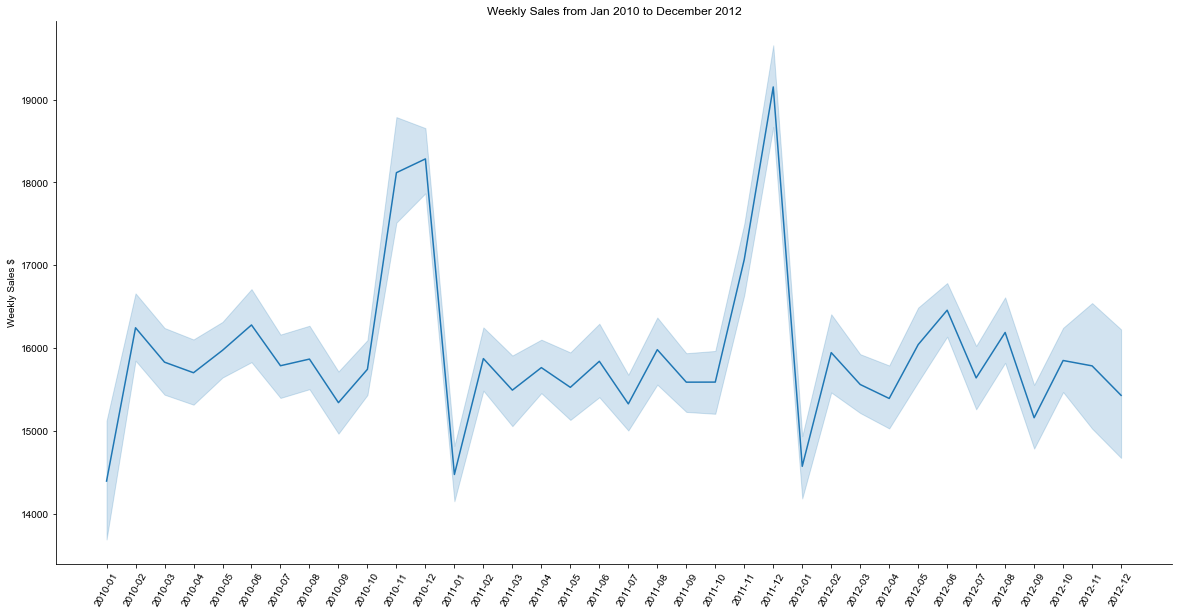

In [23]:
#Plot of weekly sales over time
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 60)
plt1 = sns.lineplot(x='Year-Month',y='Weekly_Sales',data=merge_df)
plt1.set_title("Weekly Sales from Jan 2010 to December 2012")
plt1.set_ylabel('Weekly Sales $')
plt1.set_xlabel("")
sns.set_style('white')
sns.despine()
plt.show()

Weekly Sales typically stay between 15,000 and 17,000 other than what looks like spikes during holiday seasons. Interestingly, this spike in sales around the holiday season doesn't seem to be occuring in the 2012 data.

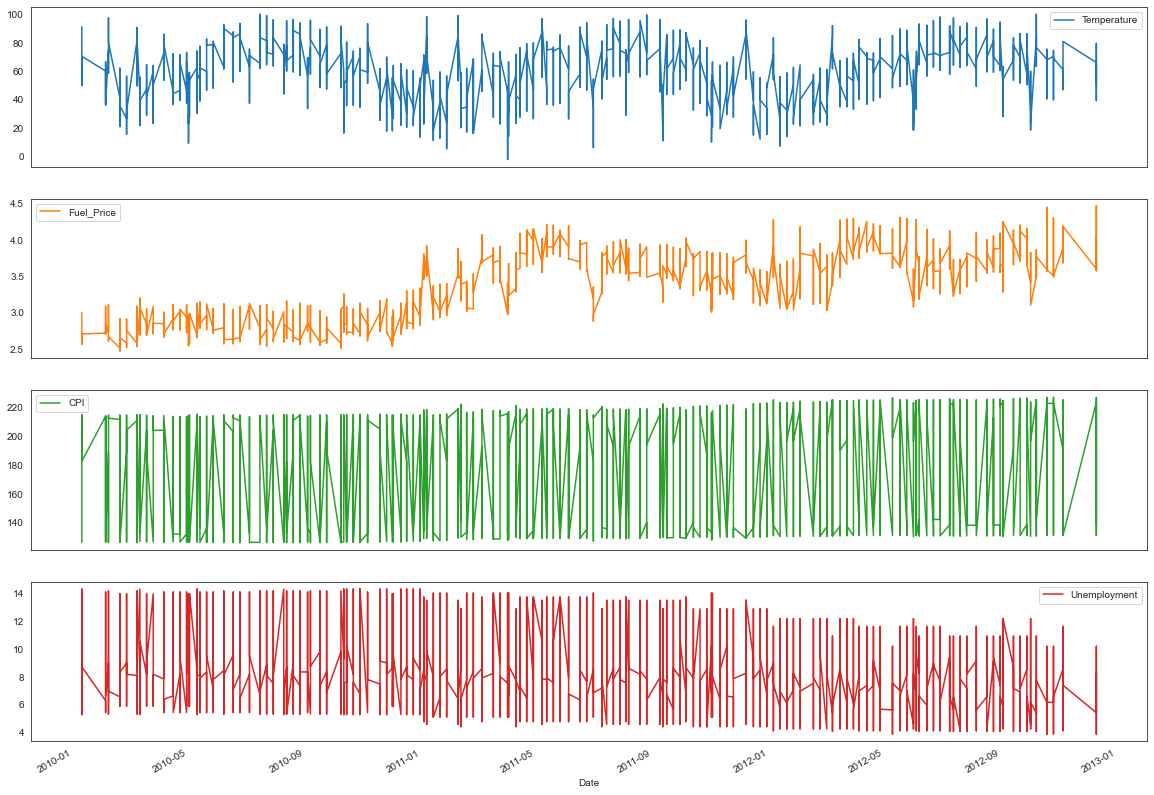

In [24]:
#Looking at features over time
merge_df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

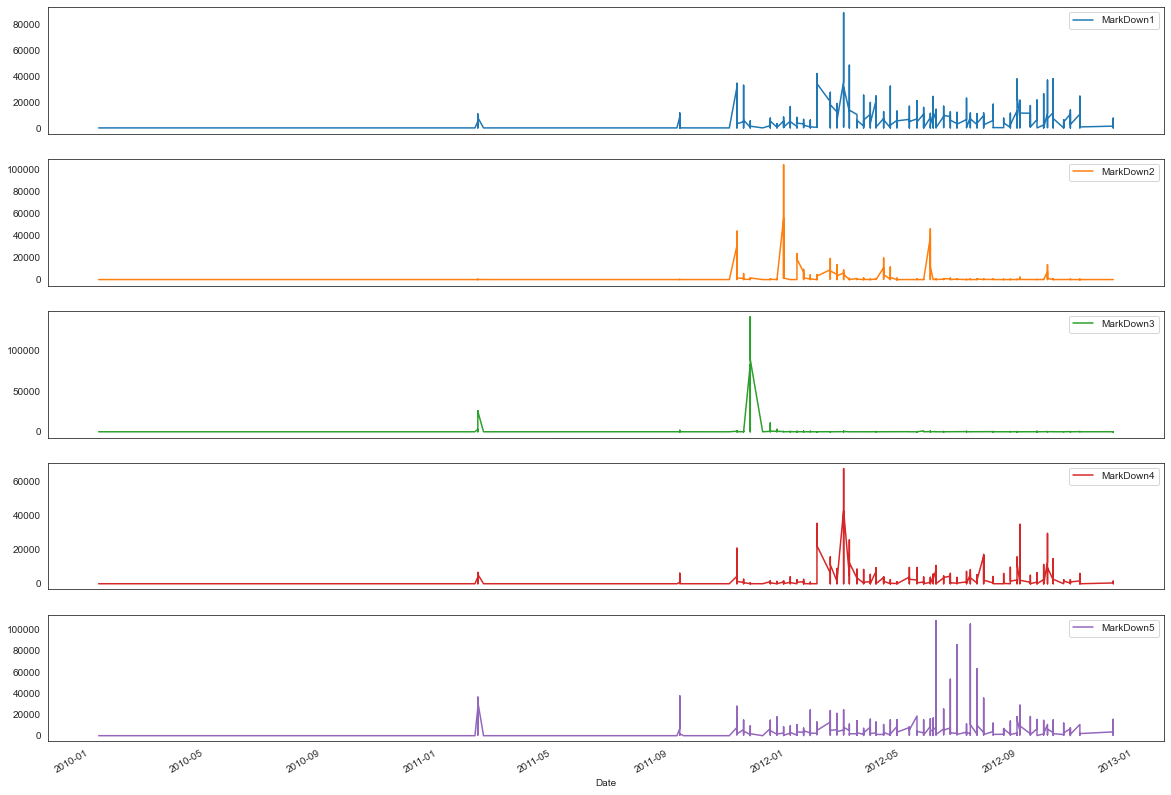

In [25]:
#looking at markdown activity over time
merge_df[['Date','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

The vast majority of markdown activity is occuring at the beginning of 2012 and on. This would make sense with what was occuring with the sales data. Sales drop at the beginning of 2012, so there was probably an increase in markdown activity to try and right size sales. 

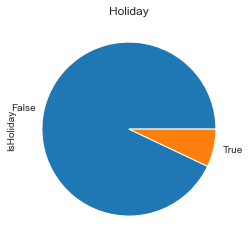

In [26]:
#Distribution of holiday boolean feature
merge_df['IsHoliday'].value_counts().plot(kind='pie')
plt.title("Holiday")
plt.show()

Text(0.5, 1.0, 'Store Types')

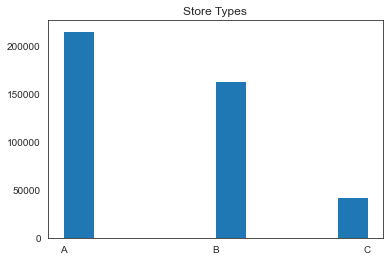

In [27]:
#Store Type Distribution
plt.hist(merge_df.Type)
plt.title("Store Types")

Vast majority of points are for store types A and B. With less data for store type 3, we may poorer performance of any models for type C stores.

#### CORRELATION

<AxesSubplot:>

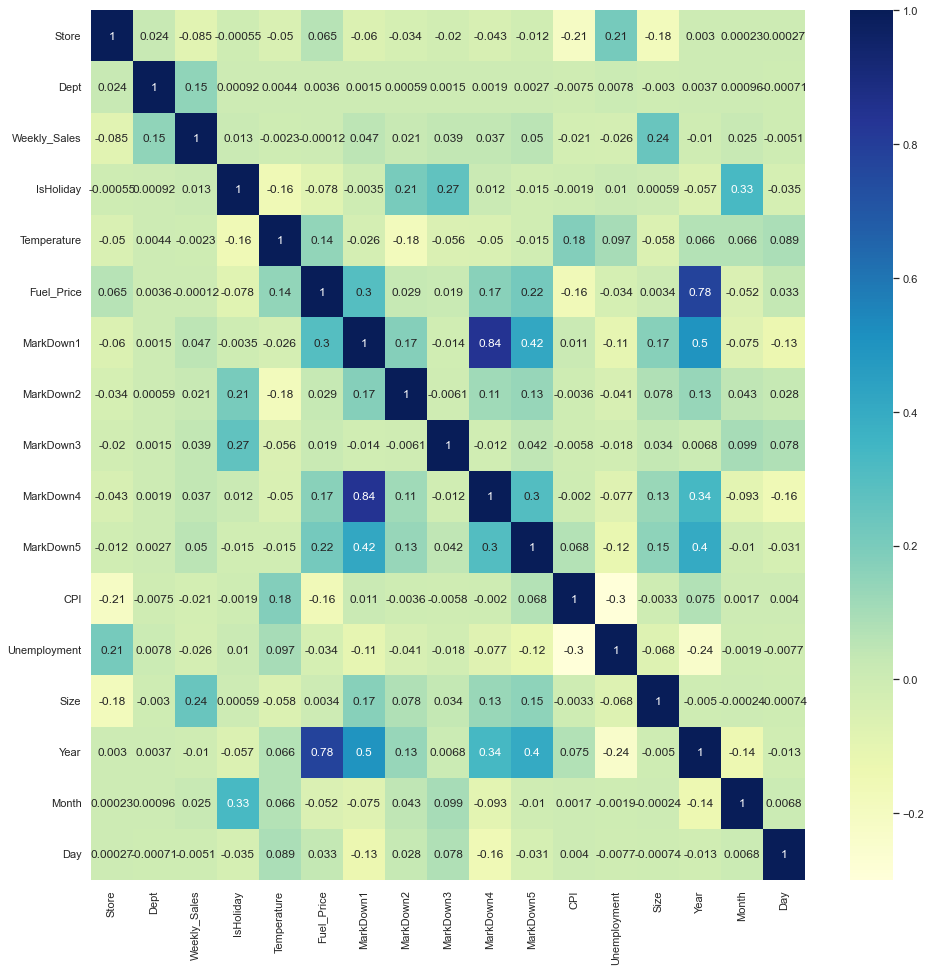

In [28]:
#Plotting correlation heatmap 
sns.set(font_scale=1)
plt.figure(figsize=(16,16))

#Finding correlation
corr = merge_df.corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

Right now, it looks like store size is having the largest impact on weekly sales. This would makes sense because larger stores probably have more product to sell.  

### 3. TESTING MODEL ASSUMPTIONS

In [29]:
#Getting avg weekly sales for all stores
df_average_sales_week = merge_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

In [30]:
#Creating time series of avg sales
ts = df_average_sales_week.set_index('Date')


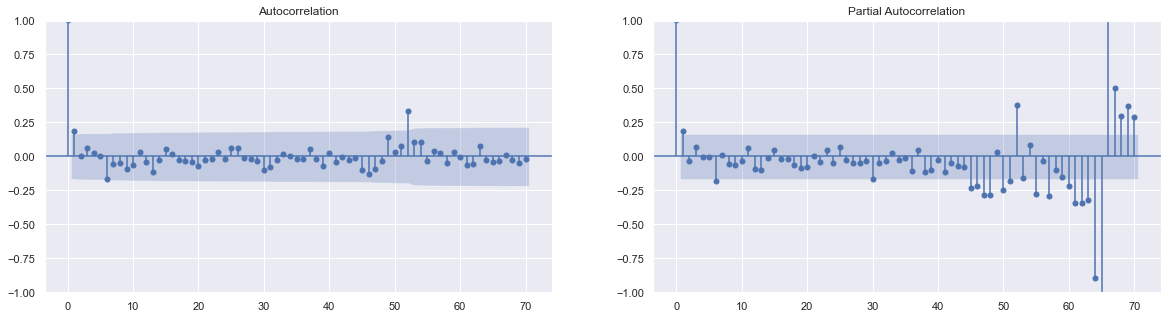

In [31]:
#Inspecting autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=70, ax=axes[0])
plot_pacf(ts, lags=70, ax=axes[1])
plt.show()


<AxesSubplot:xlabel='Date'>

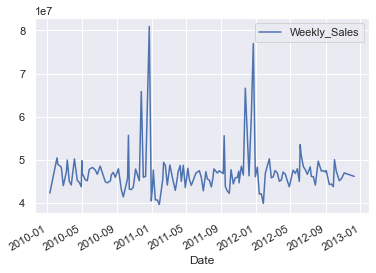

In [32]:
ts.plot()

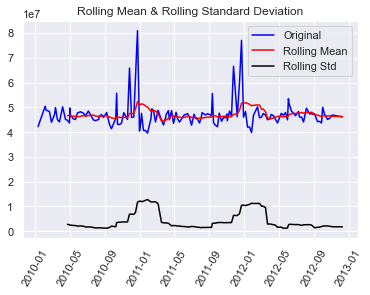

In [33]:
#Checking rolling mean and standard deviation
rolling_mean = ts.rolling(window = 12).mean()
rolling_std = ts.rolling(window = 12).std()
plt.plot(ts, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.xticks(rotation = 60)
plt.show()

Checking visually, the data is stationary. But I'm going to check it one other way.

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
test_result = adfuller(ts['Weekly_Sales'])

In [36]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(ts['Weekly_Sales'])

ADF Test Statistic : -9.837721580746786
p-value : 4.84510284992098e-17
#Lags Used : 0
Number of Observations : 142
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


### 4. MODEL TESTING AND EVALUATION

#### SARIMA

In [37]:
import statsmodels.api as sm

In [38]:
ts.head(10)

Weekly_Sales
Date                    
2010-01-10   42239875.87
2010-02-04   50423831.26
2010-02-07   48917484.50
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-09   47194257.61
2010-03-12   49909027.88
2010-03-19   44988974.64
2010-03-26   44133961.05
2010-04-06   50188543.12

In [39]:
#Autoregression Model without Exogenous Variables - Sales Only
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts, orders):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    score =lin_reg.score(X[mask],Y[mask])
    
    
    return lin_reg.coef_, lin_reg.intercept_


def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])

##### Total Chain Test

[[ 0.13488444 -0.06693086  0.53027452]] [19022705.56418554]
Score factor: 0.41


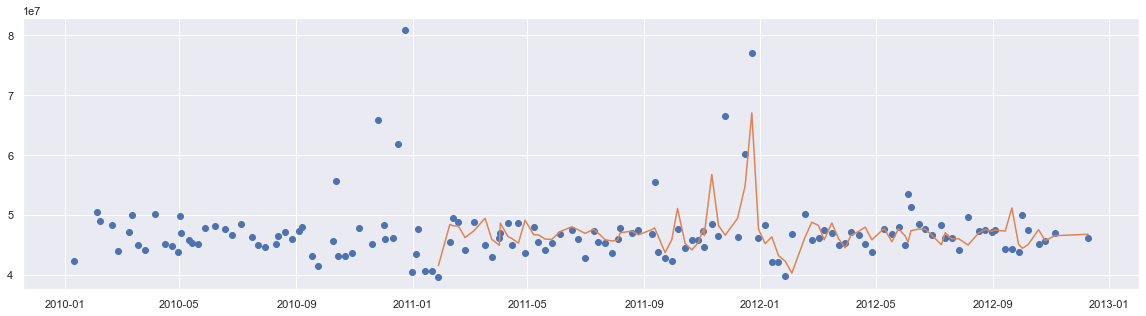

In [40]:
orders=np.array([1,6,52]) #p,d,q
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.00, std 0.07


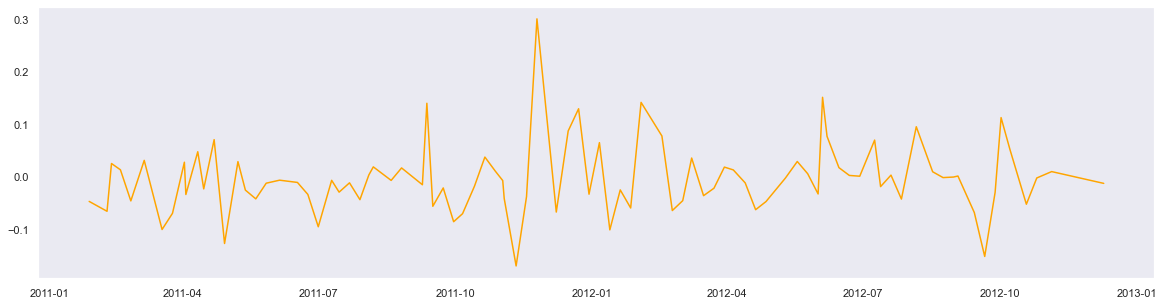

In [41]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

##### Largest Store Test

In [42]:
#Looking for largest store
store=merge_df.groupby(by='Store').sum()

In [43]:
print("Store with largest Sales Volume:",store['Weekly_Sales'].idxmax())

Store with largest Sales Volume: 20


In [44]:
#pulling only store 20 data 
df20=merge_df.where( merge_df['Store'] == 20)
df20=df20.dropna()
df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.head()

Weekly_Sales
Date                    
2010-01-10    1933719.21
2010-02-04    2405395.22
2010-02-07    2143676.77
2010-02-19    2161549.76
2010-02-26    1898193.95

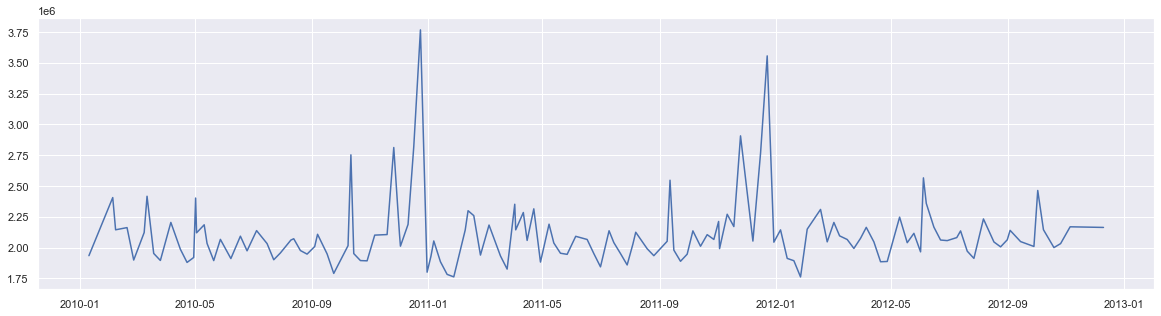

In [45]:
plt.figure(figsize=(20,5))
plt.plot(df20.index, df20.values)
plt.show()

Trends appear similar to overall total sales

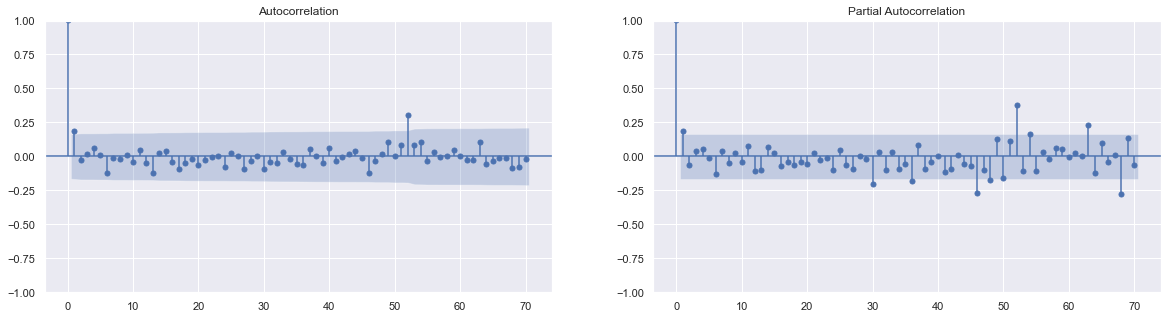

In [46]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df20.values, lags=70, ax=axes[0])
plot_pacf(df20.values, lags=70, ax=axes[1])
plt.show()


[[ 0.10930369 -0.05888729  0.04638539 -0.07044943  0.46939893]] [1075563.7365969]
Score factor: 0.34


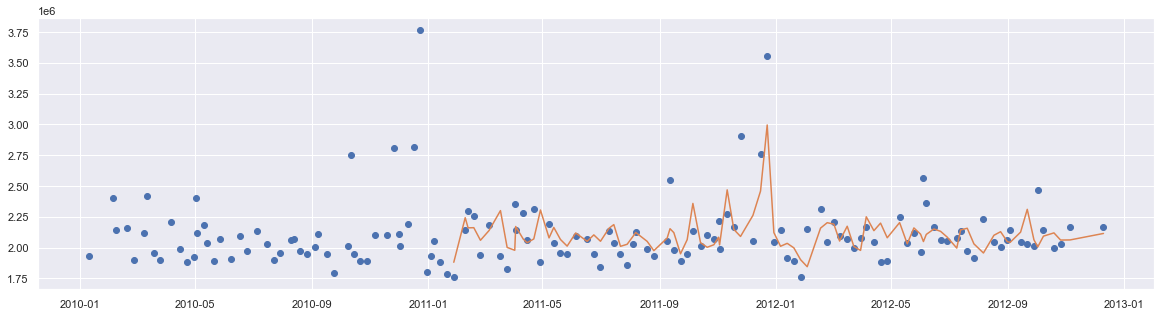

In [47]:
#Fitting model with additional seasonalities in weeks 29 and 46
orders=np.array([1,6,29,46,52])
coef, intercept = fit_ar_model(df20,orders)
pred=pd.DataFrame(index=df20.index, data=predict_ar_model(df20, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.01, std 0.08


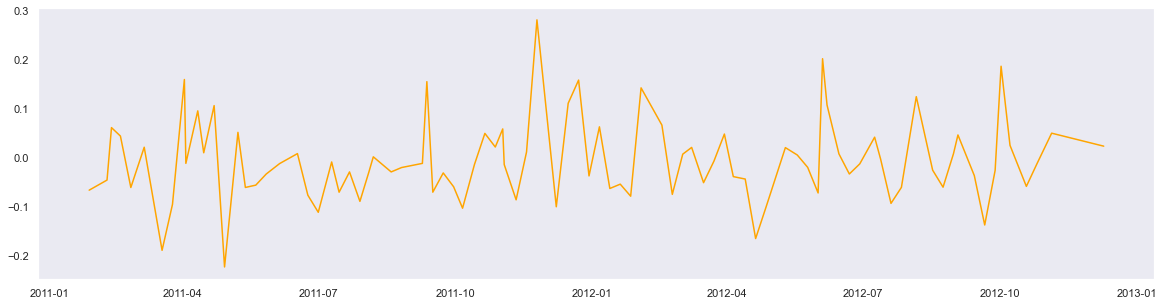

In [48]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

Neither of these models include any exogenous variables. They only include seasonality as an additional factor to the baseline ARIMA model. The model for total sales was more significant with an R2 score of .41 than for store 20 at .34.

#### SARIMAX

##### Largest Store Test

In [49]:
#Testing with store 20.
#Including exogenous features
dfext=merge_df.where( merge_df['Store'] == 20)
dfext=dfext.dropna()
dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext = dfext.set_index('Date')
dfext.head()

Temperature  Fuel_Price         CPI  Unemployment  MarkDown1  \
Date                                                                       
2010-01-10        61.08       2.707  204.885097         7.484        0.0   
2010-02-04        51.00       2.850  204.025284         7.856        0.0   
2010-02-07        70.10       2.815  204.465056         7.527        0.0   
2010-02-19        25.43       2.745  204.432100         8.187        0.0   
2010-02-26        32.32       2.754  204.463087         8.187        0.0   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5  
Date                                                    
2010-01-10        0.0        0.0        0.0        0.0  
2010-02-04        0.0        0.0        0.0        0.0  
2010-02-07        0.0        0.0        0.0        0.0  
2010-02-19        0.0        0.0        0.0        0.0  
2010-02-26        0.0        0.0        0.0        0.0

In [50]:
#Creating 1 day lag to inspect correlation
dfext['shifted_sales'] = df20.shift(-1)
dfext.head()

Temperature  Fuel_Price         CPI  Unemployment  MarkDown1  \
Date                                                                       
2010-01-10        61.08       2.707  204.885097         7.484        0.0   
2010-02-04        51.00       2.850  204.025284         7.856        0.0   
2010-02-07        70.10       2.815  204.465056         7.527        0.0   
2010-02-19        25.43       2.745  204.432100         8.187        0.0   
2010-02-26        32.32       2.754  204.463087         8.187        0.0   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5  shifted_sales  
Date                                                                   
2010-01-10        0.0        0.0        0.0        0.0     2405395.22  
2010-02-04        0.0        0.0        0.0        0.0     2143676.77  
2010-02-07        0.0        0.0        0.0        0.0     2161549.76  
2010-02-19        0.0        0.0        0.0        0.0     1898193.95  
2010-02-26        0.0        0.0        0.0        0.0     2121561.41

In [51]:
corr = dfext.corr()
corr['shifted_sales'].sort_values(ascending=False)

shifted_sales    1.000000
MarkDown5        0.084797
MarkDown2        0.050189
MarkDown1        0.035654
CPI              0.021002
MarkDown4        0.013042
MarkDown3        0.002624
Fuel_Price      -0.033798
Unemployment    -0.067482
Temperature     -0.154182
Name: shifted_sales, dtype: float64

The Markdowns and Temperature appear to be the most strongly correlated

In [52]:

def fit_ar_model_ext(ts, orders, ext, fitter=LinearRegression()):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ext.values, axis=1)
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    fitter.fit(X[mask],Y[mask].ravel())
    
    

    print('Score factor: %.2f' % fitter.score(X[mask],Y[mask]))
    
    
    
    
    return fitter.coef_, fitter.intercept_
    
def predict_ar_model_ext(ts, orders, ext, coef, intercept):

    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ext.values, axis=1)
    
    return np.array( np.dot(X, coef.T) + intercept)

In [53]:
df20.head()

Weekly_Sales
Date                    
2010-01-10    1933719.21
2010-02-04    2405395.22
2010-02-07    2143676.77
2010-02-19    2161549.76
2010-02-26    1898193.95

Score factor: 0.58


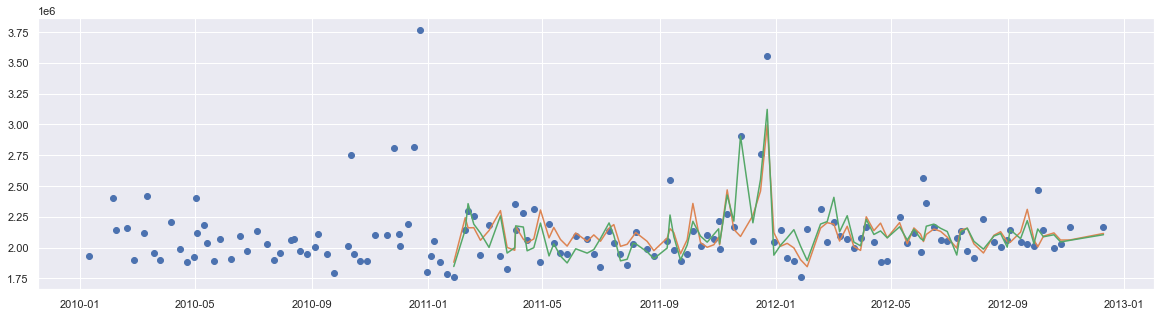

In [54]:
dfexte=dfext[['Unemployment','Fuel_Price','CPI','Temperature',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

orders=np.array([1,6,29,46,52])
coef, intercept = fit_ar_model_ext(df20,orders,dfexte)
pred_ext=pd.DataFrame(index=df20.index, data=predict_ar_model_ext(df20, orders, dfexte, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.plot(pred_ext)
plt.show()

AR Residuals: avg -0.01, std 0.08
AR with Ext Residuals: avg -0.00, std 0.07


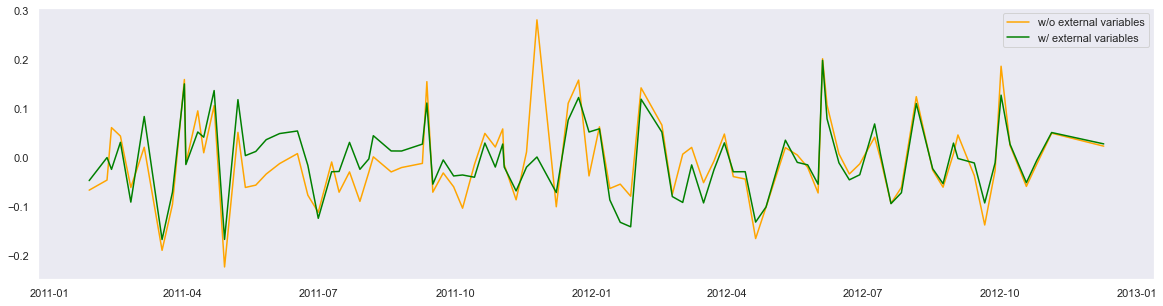

In [55]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']
diff_ext=(df20['Weekly_Sales']-pred_ext[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR with Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='w/o external variables')
plt.plot(diff_ext, c='green', label='w/ external variables')
plt.legend()
plt.grid()
plt.show()

There was a definite increase in model performance with the inclusion of the exogenous values.

In [56]:
#Creating Function to run model for each store
stores = []
ar_residuals = []
ar_residuals_std = []
ar_withext_residuals = []
ar_withext_residuals_std = []
def all_store_test(storenumber):
    #perparing each store for modeling
    df20=merge_df.where( merge_df['Store'] == storenumber)
    df20=df20.dropna()
    df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
    df20 = df20.set_index('Date')
    dfext=merge_df.where( merge_df['Store'] == storenumber)
    dfext=dfext.dropna()
    dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
    dfext = dfext.set_index('Date')
    dfexte=dfext[['Unemployment','Fuel_Price','CPI','Temperature',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

    #fitting model
    orders=np.array([1,6,29,46,52])
    print('Store Number:',storenumber)
    coef, intercept = fit_ar_model_ext(df20,orders,dfexte)
    pred_ext=pd.DataFrame(index=df20.index, data=predict_ar_model_ext(df20, orders, dfexte, coef, intercept))
    plt.figure(figsize=(20,5))
    plt.plot(df20, 'o')
    plt.plot(pred)
    plt.plot(pred_ext)
    plt.show()
    
    #Predicting
    diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']
    diff_ext=(df20['Weekly_Sales']-pred_ext[0])/df20['Weekly_Sales']
    
    ar_resid = diff.mean()
    ar_std = diff.std()
    ar_exo = diff_ext.mean()
    ar_exo_std = diff_ext.std()
    
    ar_residuals.append(ar_resid)
    ar_residuals_std.append(ar_std)
    ar_withext_residuals.append(ar_exo)
    ar_withext_residuals_std.append(ar_exo_std)
    stores.append(storenumber)
    
    #Results
    print('Store Number:',storenumber)
    print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
    print('AR wiht Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
    plt.figure(figsize=(20,5))
    plt.plot(diff, c='orange', label='w/o external variables')
    plt.plot(diff_ext, c='green', label='w/ external variables')
    plt.legend()
    plt.grid()
    plt.show()
    
    pass

##### Total Chain

In [57]:
target = merge_df.dropna()
target=target.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
target = target.set_index('Date')
features=merge_df.dropna()
features=features.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment',                                                   'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
features=features.set_index('Date')
features=features[['Unemployment','Fuel_Price','CPI','Temperature',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]


Score factor: 0.69


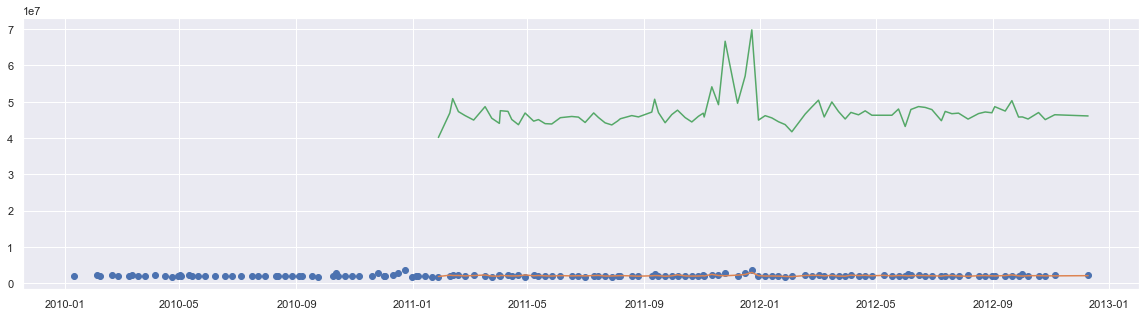

In [58]:
orders=np.array([1,6,29,46,52])
coef, intercept = fit_ar_model_ext(target,orders,features)
pred_ext=pd.DataFrame(index=df20.index, data=predict_ar_model_ext(target, orders, features, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df20, 'o')
plt.plot(pred)
plt.plot(pred_ext)
plt.show()

AR Residuals: avg 0.95, std 0.00
AR wiht Ext Residuals: avg -0.00, std 0.05


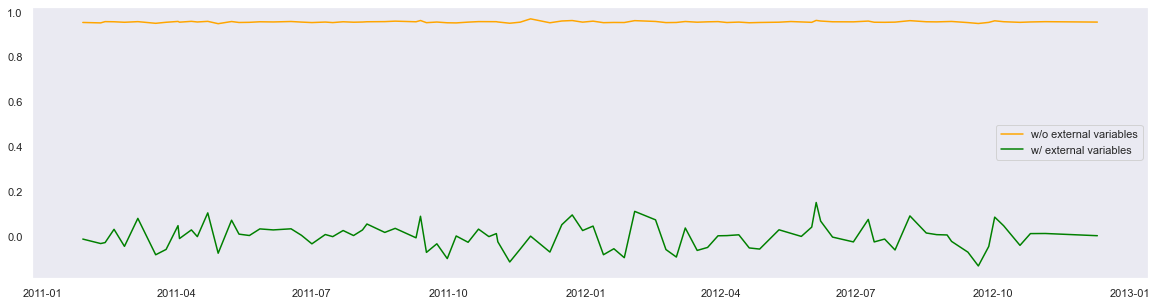

In [59]:
diff=(target['Weekly_Sales']-pred[0])/target['Weekly_Sales']
diff_ext=(target['Weekly_Sales']-pred_ext[0])/target['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR wiht Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='w/o external variables')
plt.plot(diff_ext, c='green', label='w/ external variables')
plt.legend()
plt.grid()
plt.show()

Store Number: 1
Score factor: 0.54


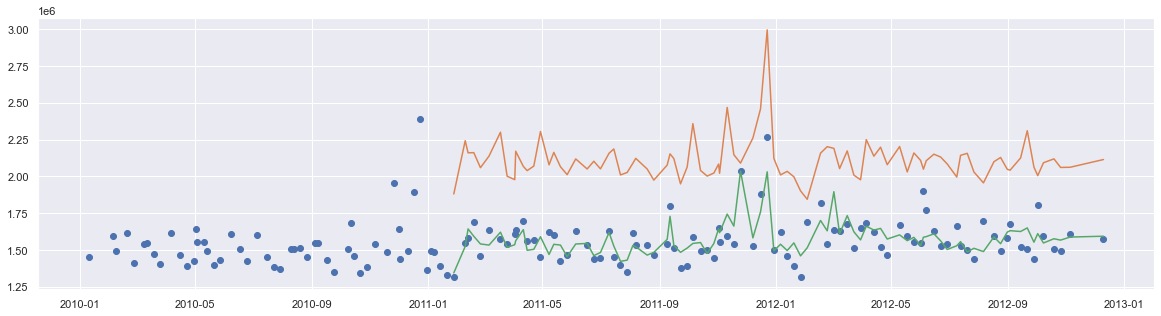

Store Number: 1
AR Residuals: avg -0.35, std 0.10
AR wiht Ext Residuals: avg -0.00, std 0.06


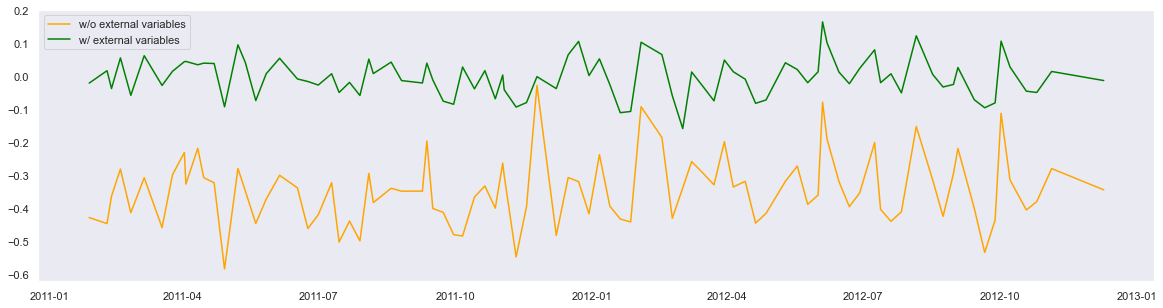

Store Number: 2
Score factor: 0.65


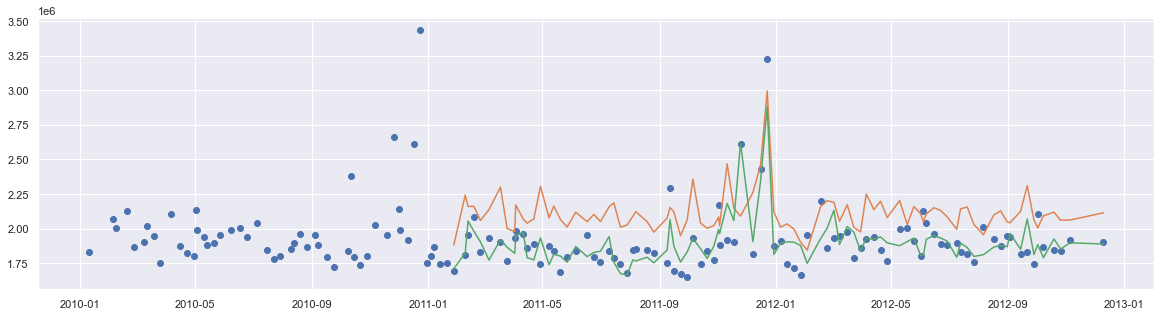

Store Number: 2
AR Residuals: avg -0.12, std 0.09
AR wiht Ext Residuals: avg -0.00, std 0.06


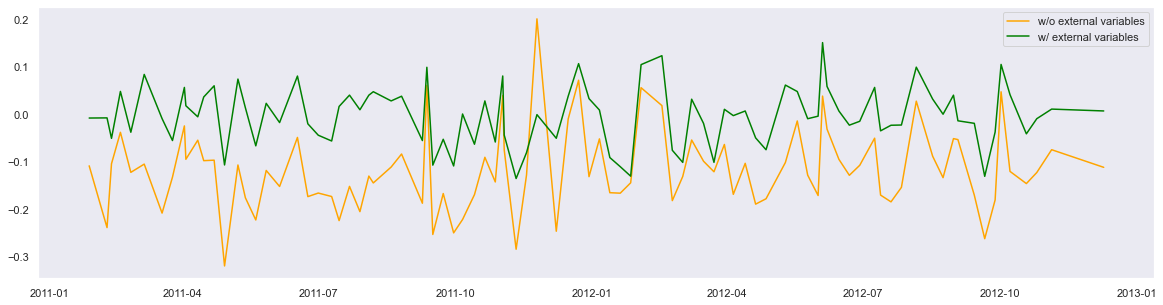

Store Number: 3
Score factor: 0.60


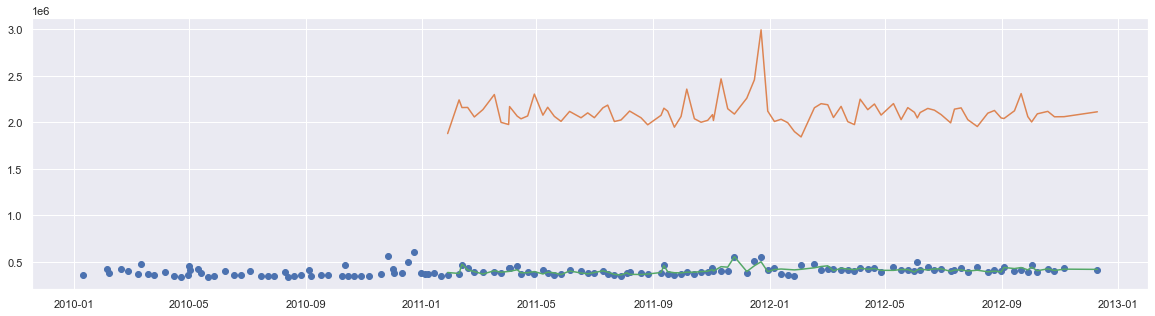

Store Number: 3
AR Residuals: avg -4.17, std 0.45
AR wiht Ext Residuals: avg -0.00, std 0.06


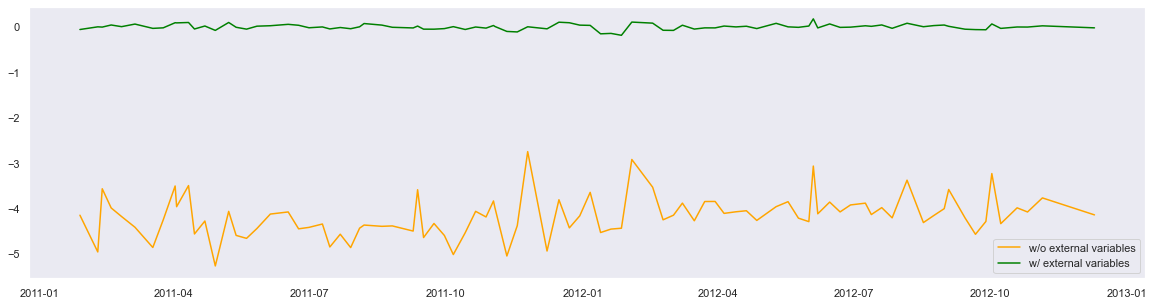

Store Number: 4
Score factor: 0.69


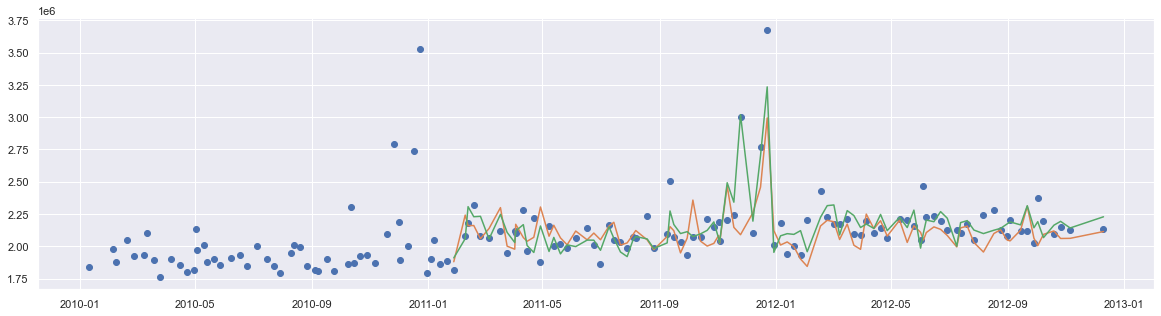

Store Number: 4
AR Residuals: avg 0.02, std 0.07
AR wiht Ext Residuals: avg -0.00, std 0.06


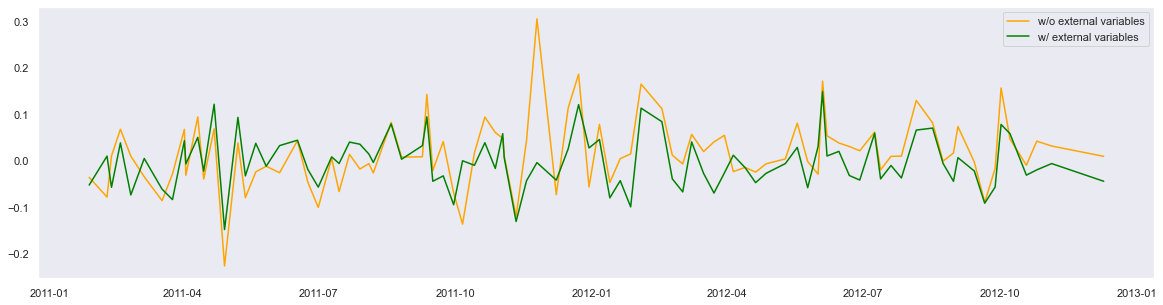

Store Number: 5
Score factor: 0.64


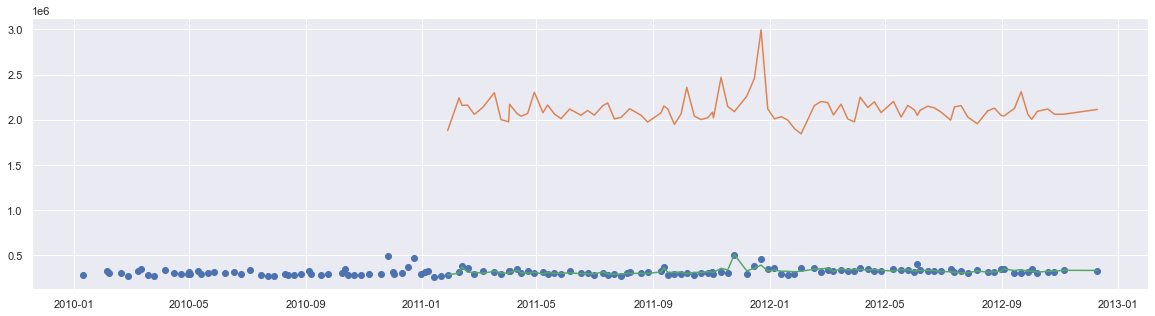

Store Number: 5
AR Residuals: avg -5.57, std 0.61
AR wiht Ext Residuals: avg -0.00, std 0.06


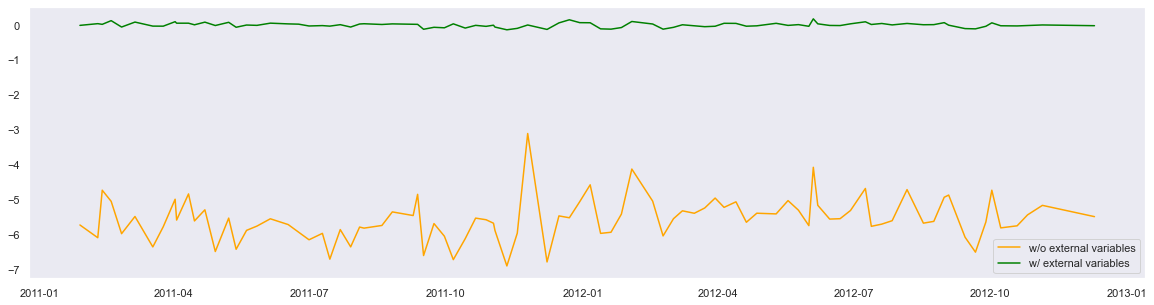

Store Number: 6
Score factor: 0.58


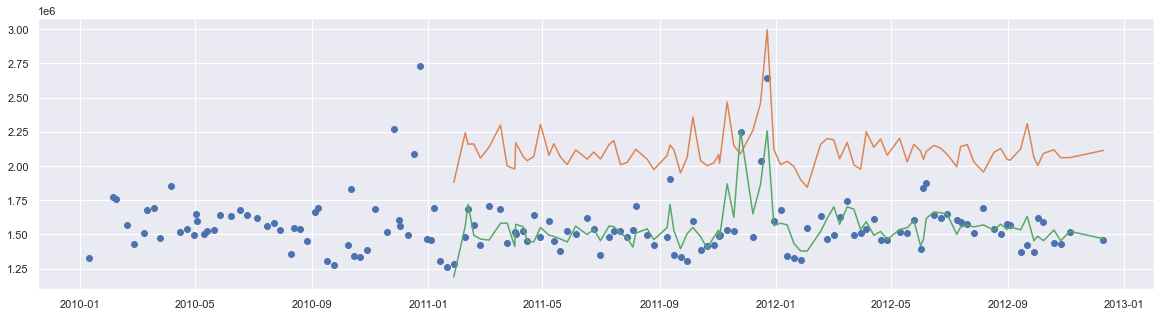

Store Number: 6
AR Residuals: avg -0.37, std 0.12
AR wiht Ext Residuals: avg -0.01, std 0.08


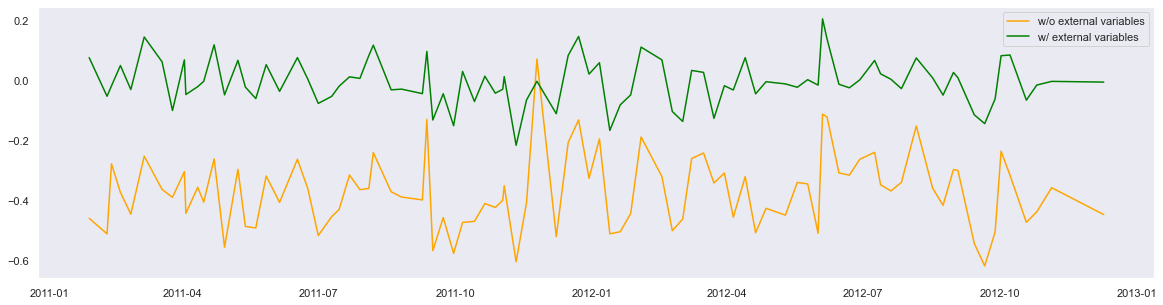

Store Number: 7
Score factor: 0.69


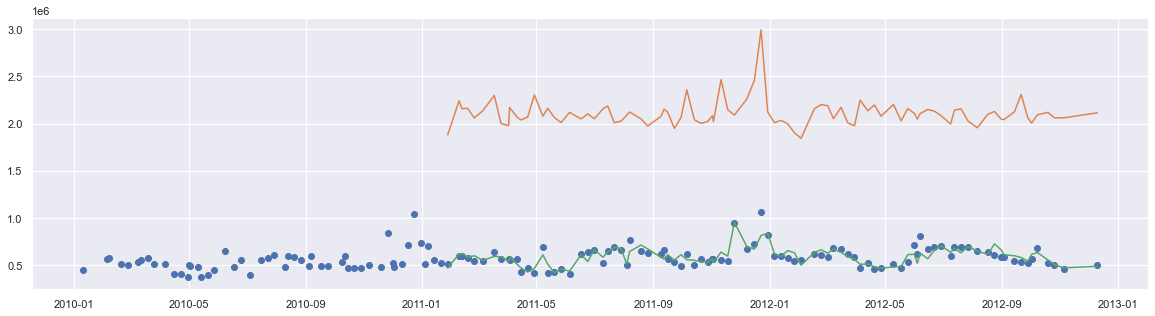

Store Number: 7
AR Residuals: avg -2.67, std 0.62
AR wiht Ext Residuals: avg -0.01, std 0.09


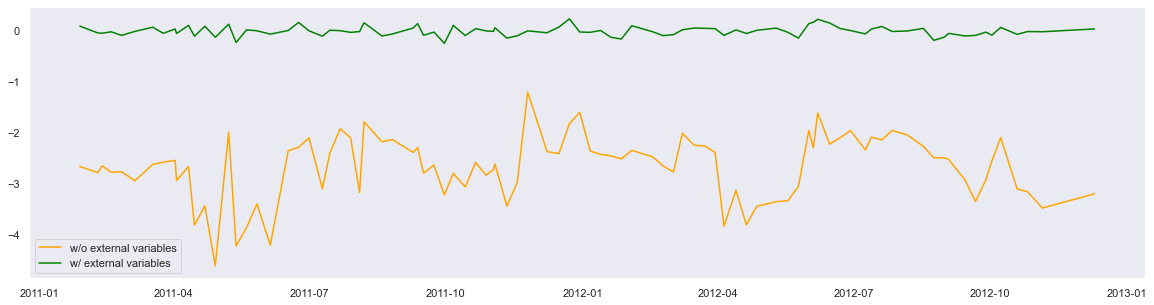

Store Number: 8
Score factor: 0.57


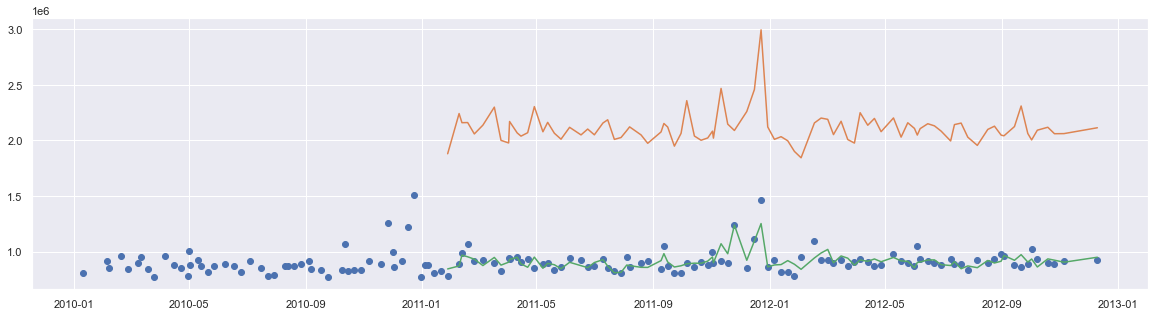

Store Number: 8
AR Residuals: avg -1.32, std 0.18
AR wiht Ext Residuals: avg -0.00, std 0.06


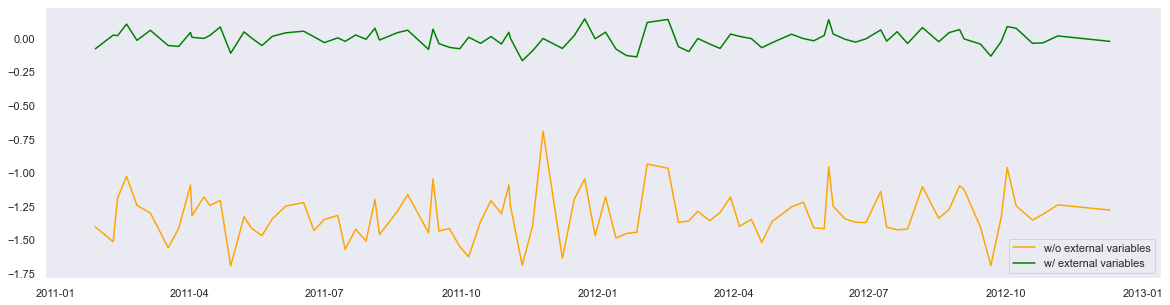

Store Number: 9
Score factor: 0.61


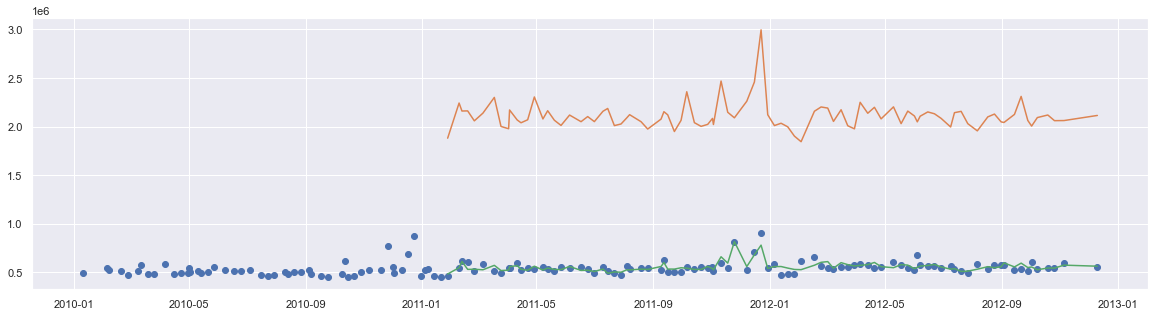

Store Number: 9
AR Residuals: avg -2.81, std 0.32
AR wiht Ext Residuals: avg -0.00, std 0.07


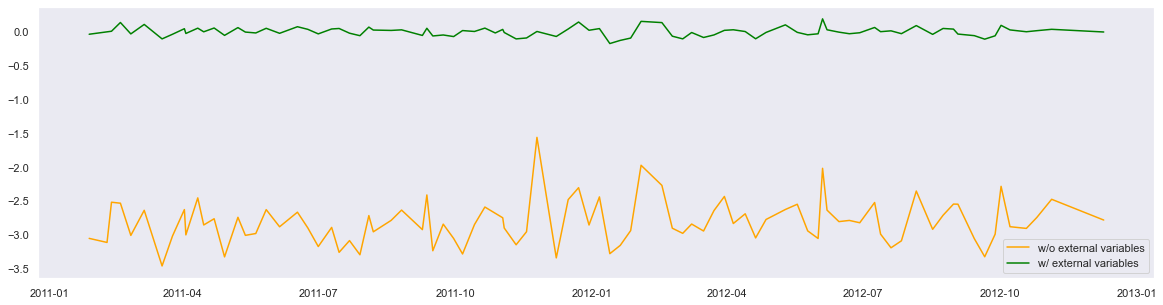

Store Number: 10
Score factor: 0.72


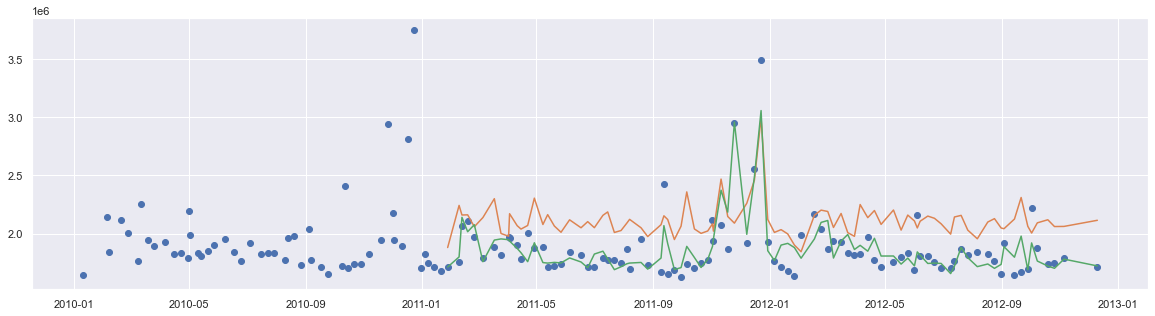

Store Number: 10
AR Residuals: avg -0.14, std 0.11
AR wiht Ext Residuals: avg -0.00, std 0.07


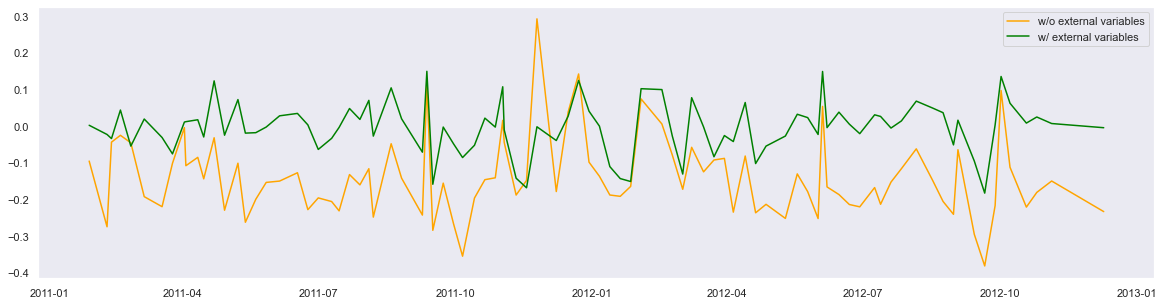

Store Number: 11
Score factor: 0.62


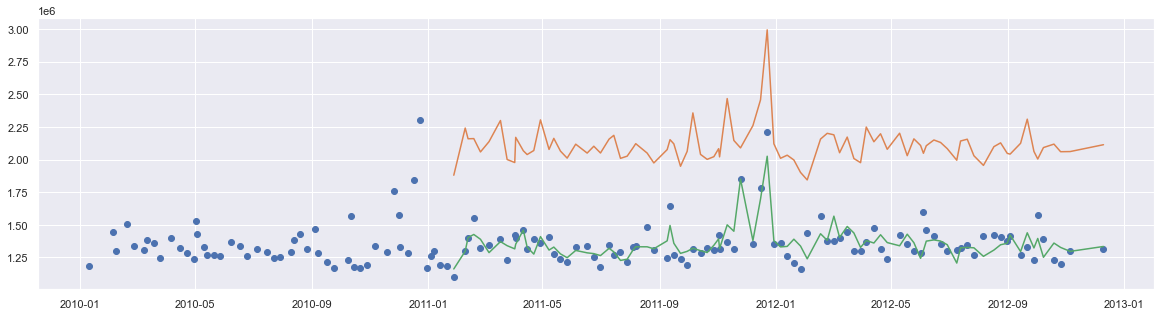

Store Number: 11
AR Residuals: avg -0.56, std 0.13
AR wiht Ext Residuals: avg -0.00, std 0.07


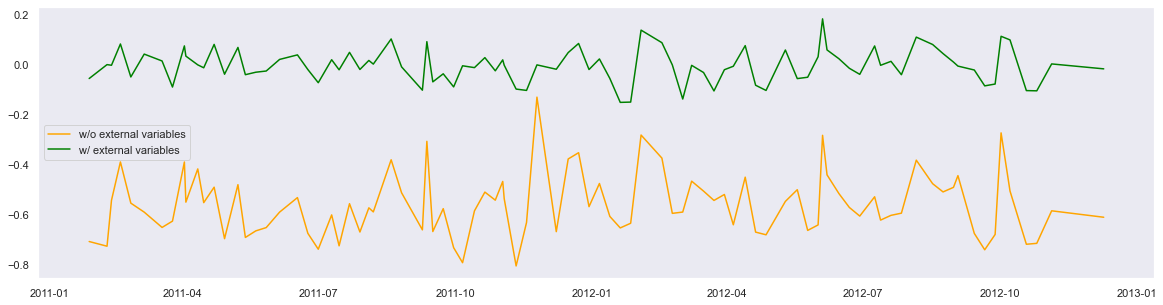

Store Number: 12
Score factor: 0.68


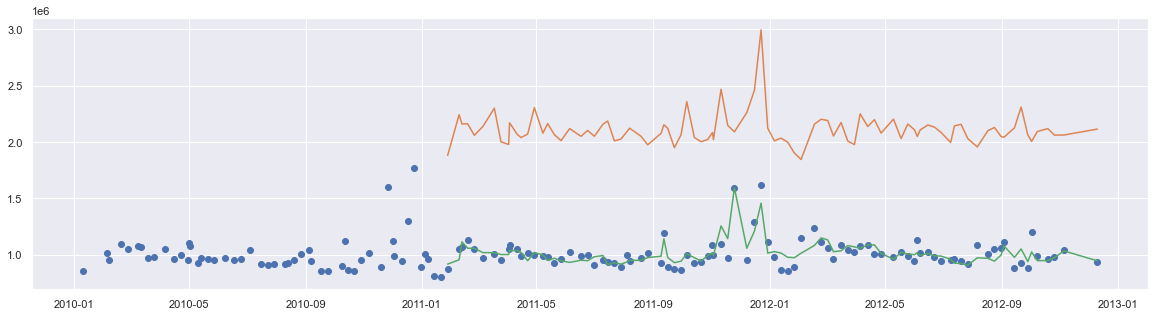

Store Number: 12
AR Residuals: avg -1.10, std 0.19
AR wiht Ext Residuals: avg -0.00, std 0.07


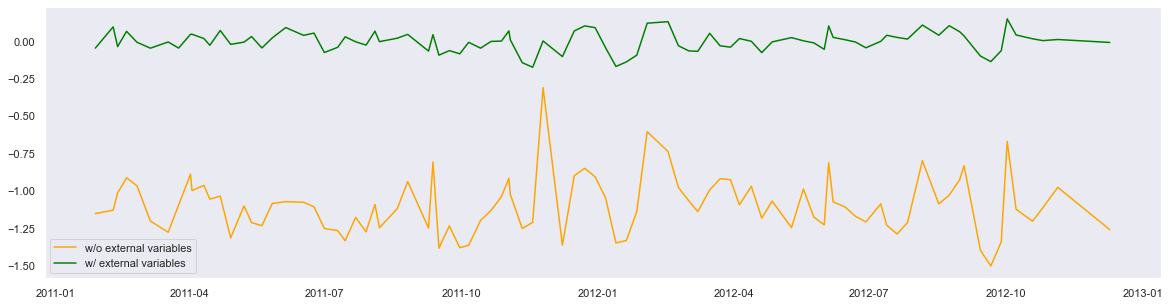

Store Number: 13
Score factor: 0.67


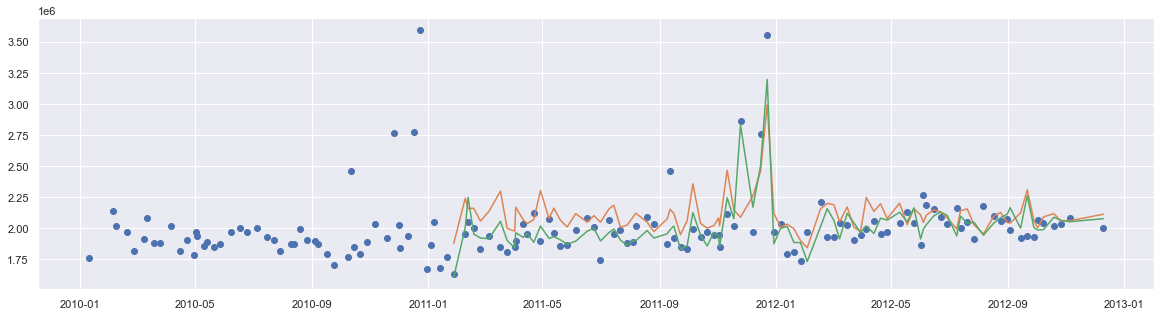

Store Number: 13
AR Residuals: avg -0.05, std 0.08
AR wiht Ext Residuals: avg -0.00, std 0.06


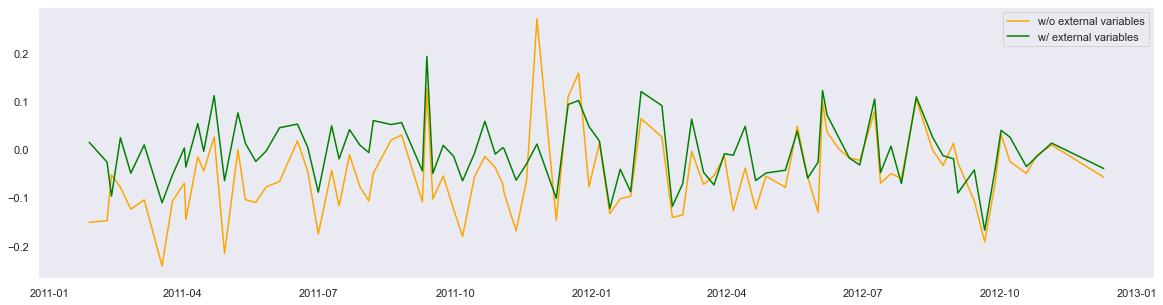

Store Number: 14
Score factor: 0.60


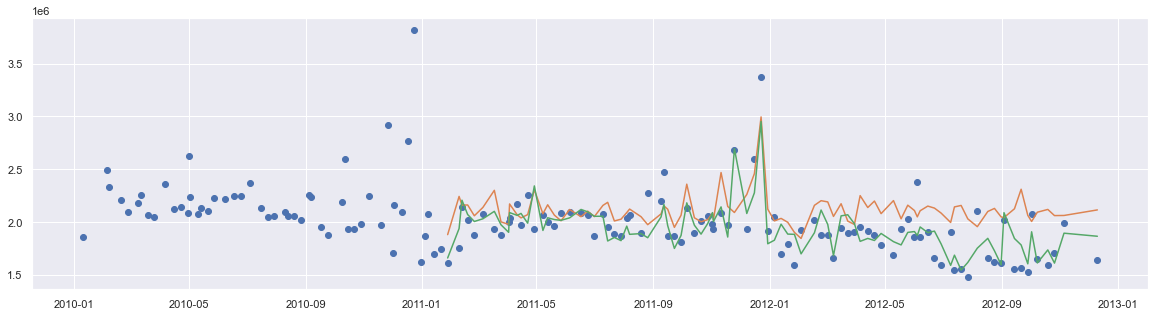

Store Number: 14
AR Residuals: avg -0.11, std 0.14
AR wiht Ext Residuals: avg -0.01, std 0.09


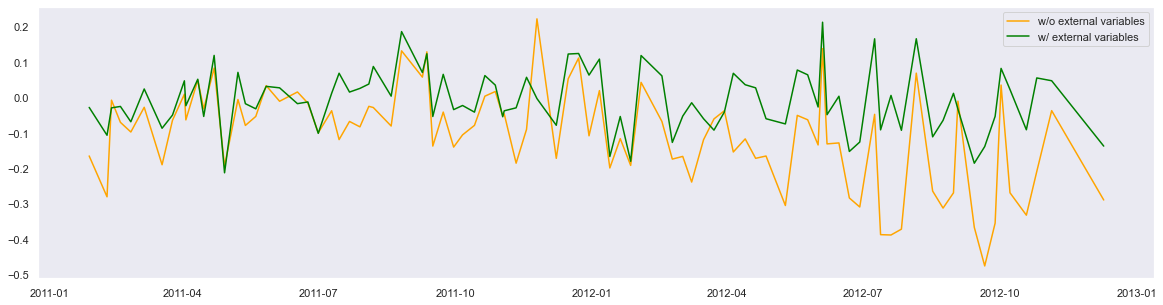

Store Number: 15
Score factor: 0.68


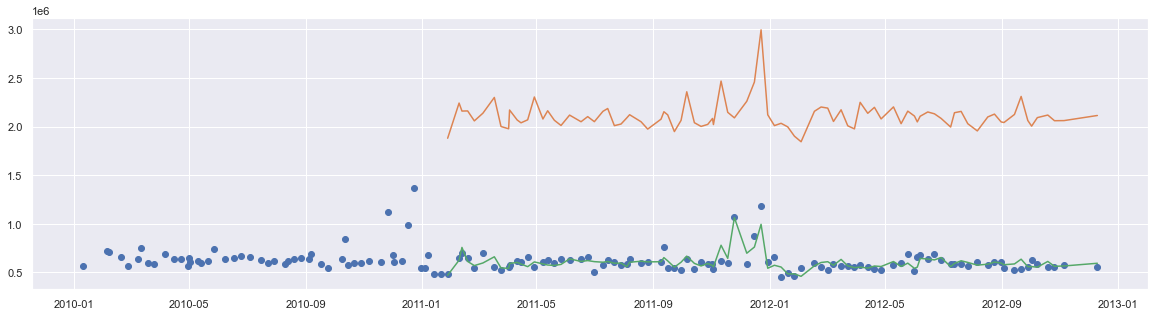

Store Number: 15
AR Residuals: avg -2.55, std 0.39
AR wiht Ext Residuals: avg -0.01, std 0.09


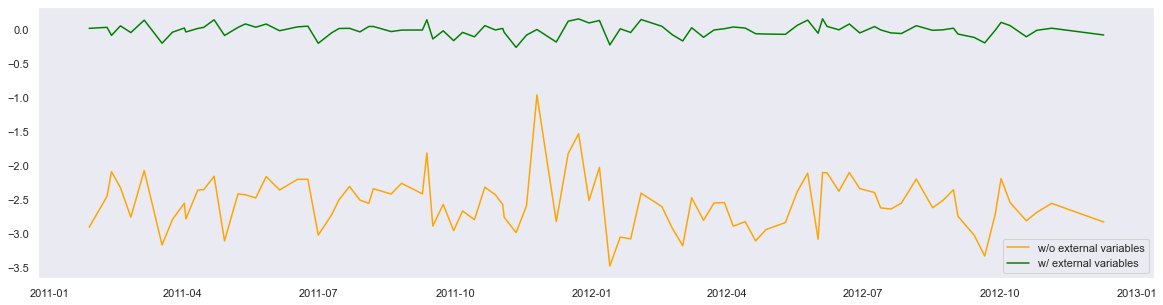

Store Number: 16
Score factor: 0.71


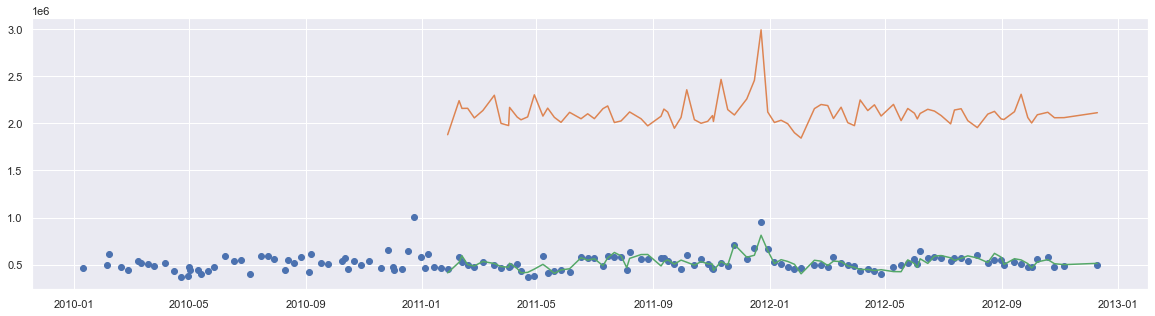

Store Number: 16
AR Residuals: avg -3.11, std 0.55
AR wiht Ext Residuals: avg -0.01, std 0.08


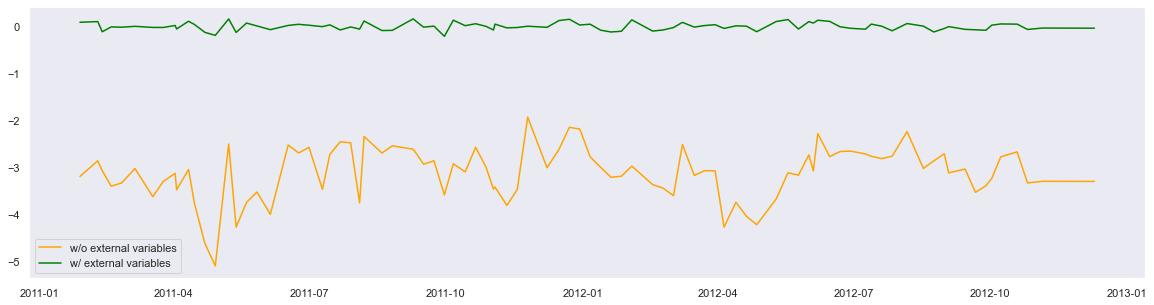

Store Number: 17
Score factor: 0.42


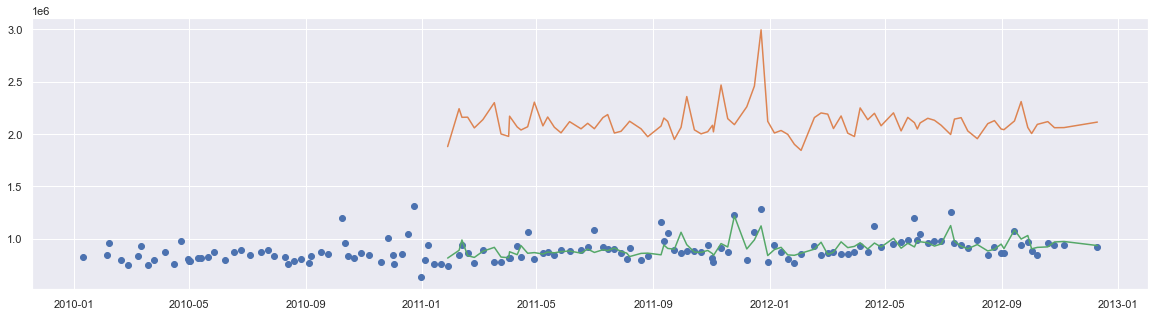

Store Number: 17
AR Residuals: avg -1.32, std 0.25
AR wiht Ext Residuals: avg -0.01, std 0.08


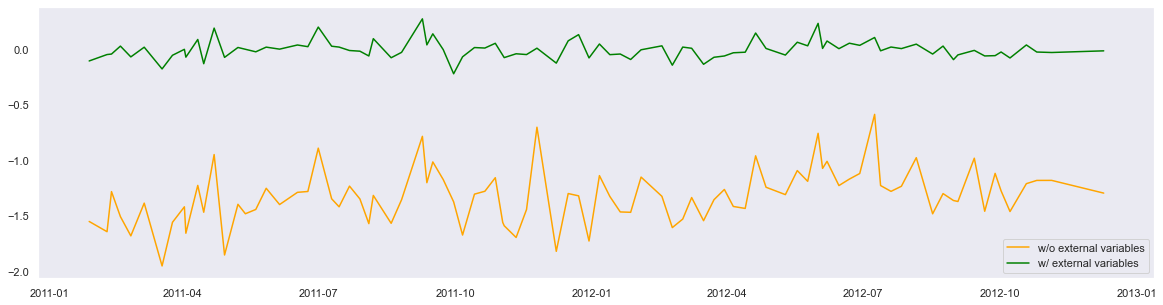

Store Number: 18
Score factor: 0.55


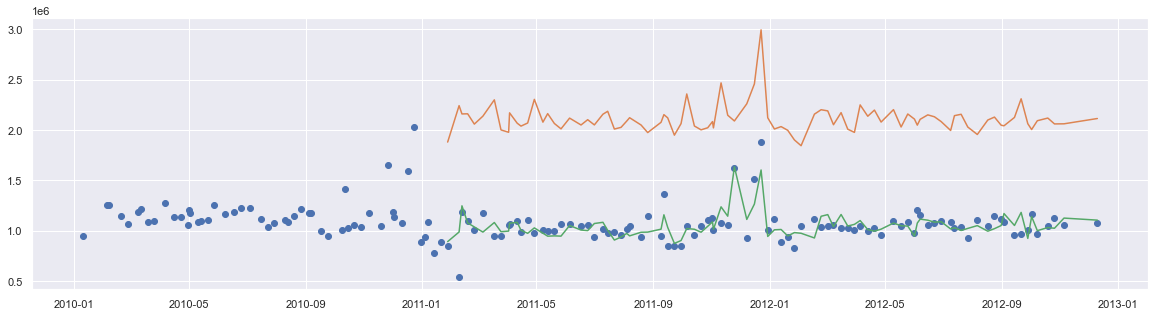

Store Number: 18
AR Residuals: avg -1.05, std 0.30
AR wiht Ext Residuals: avg -0.01, std 0.12


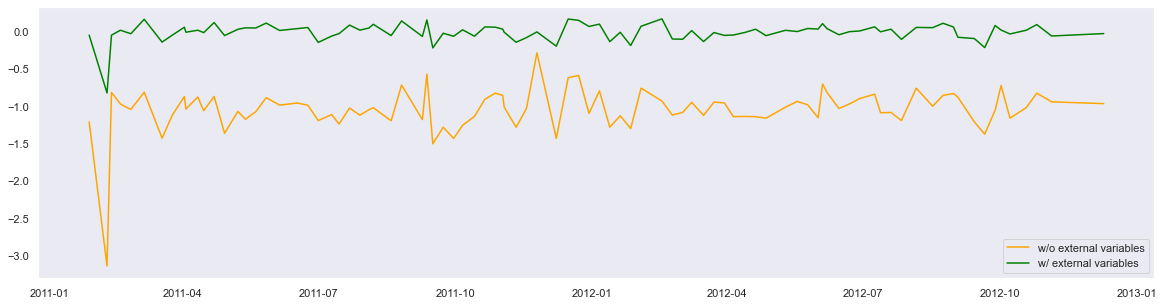

Store Number: 19
Score factor: 0.64


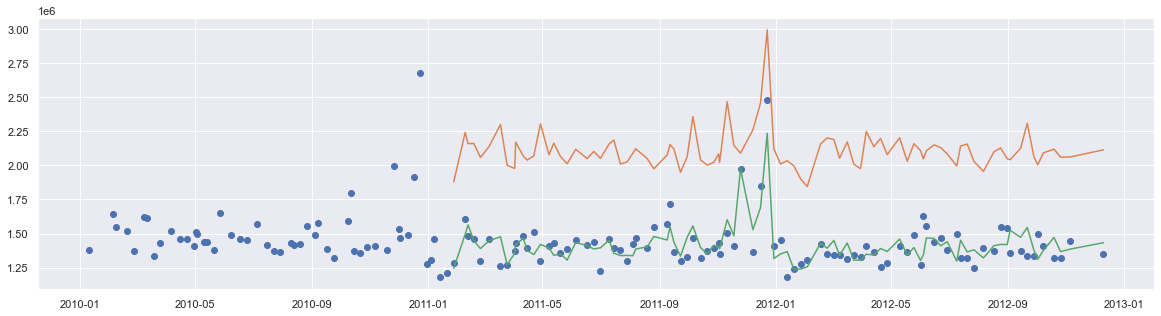

Store Number: 19
AR Residuals: avg -0.50, std 0.13
AR wiht Ext Residuals: avg -0.00, std 0.07


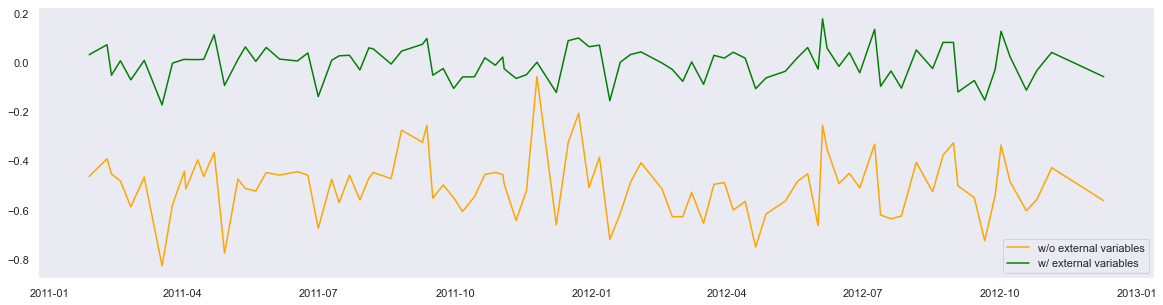

Store Number: 20
Score factor: 0.58


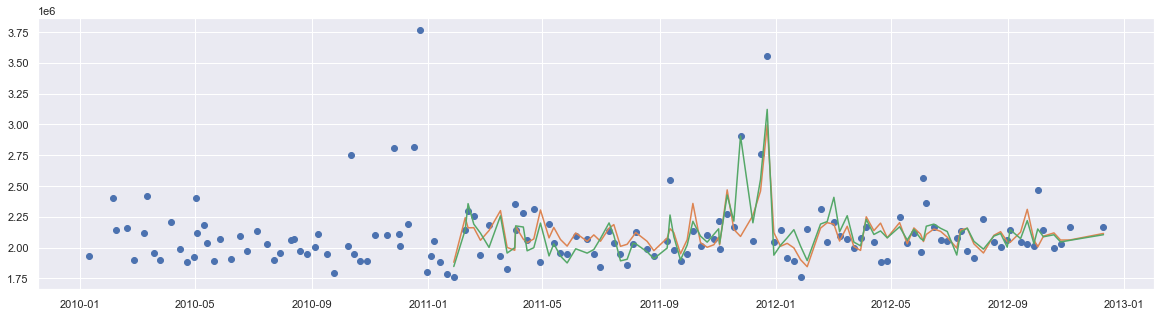

Store Number: 20
AR Residuals: avg -0.01, std 0.08
AR wiht Ext Residuals: avg -0.00, std 0.07


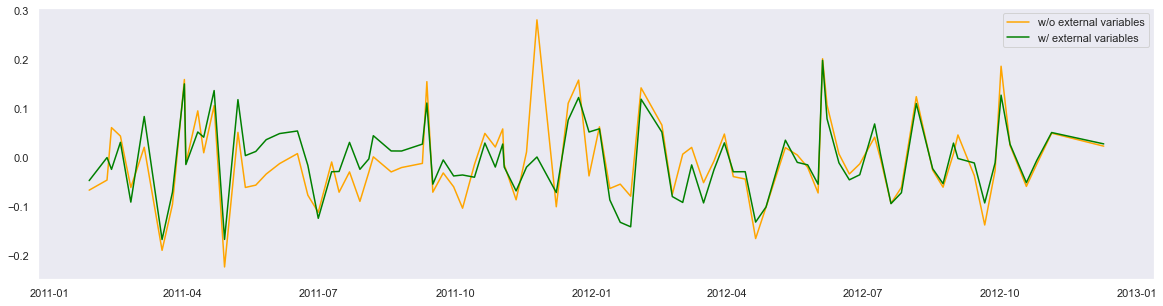

Store Number: 21
Score factor: 0.72


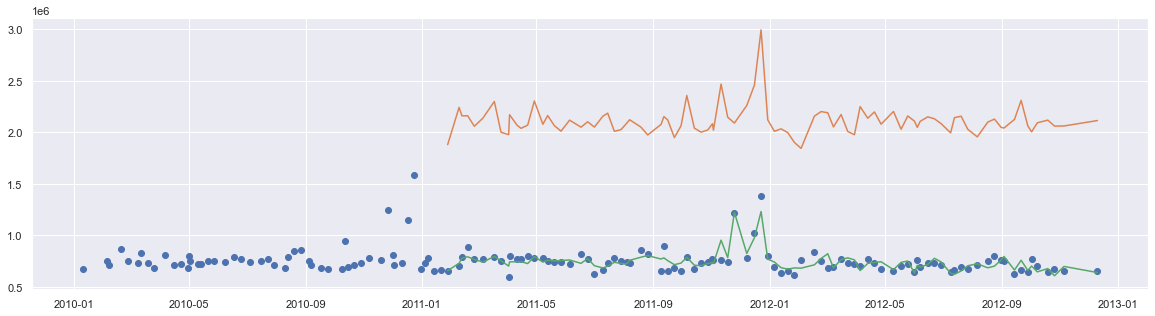

Store Number: 21
AR Residuals: avg -1.87, std 0.30
AR wiht Ext Residuals: avg -0.01, std 0.08


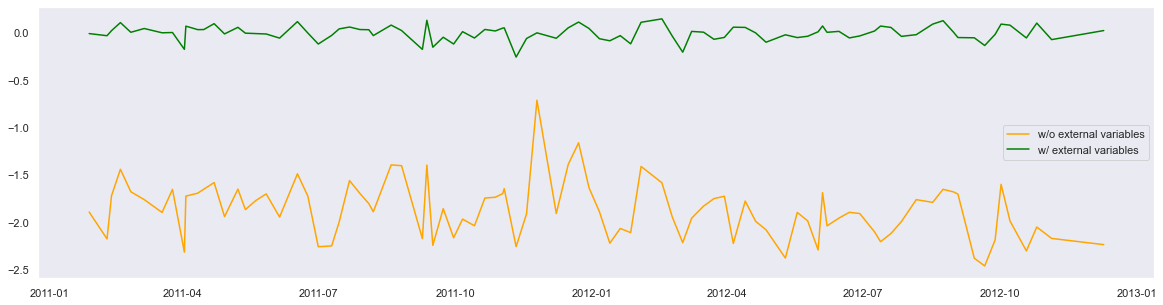

Store Number: 22
Score factor: 0.61


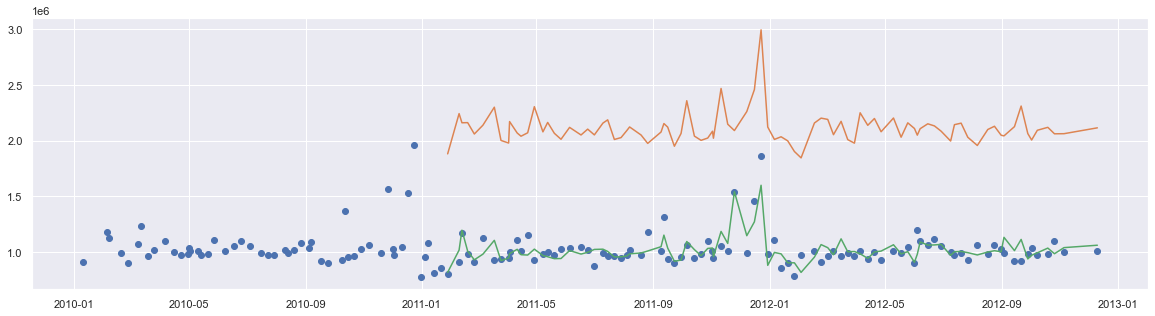

Store Number: 22
AR Residuals: avg -1.10, std 0.21
AR wiht Ext Residuals: avg -0.01, std 0.08


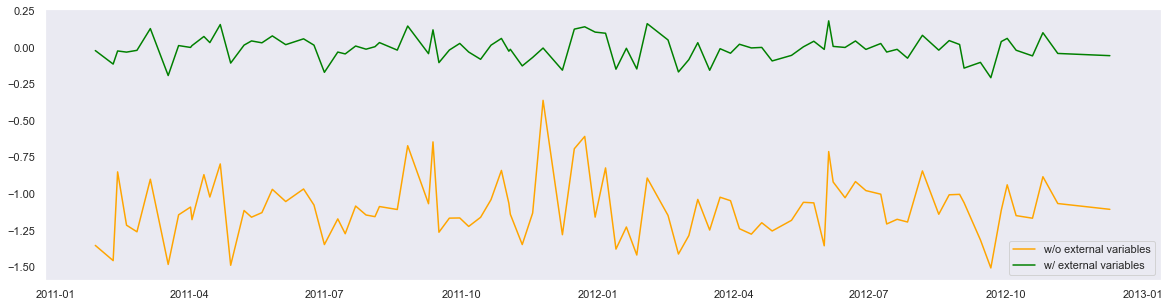

Store Number: 23
Score factor: 0.66


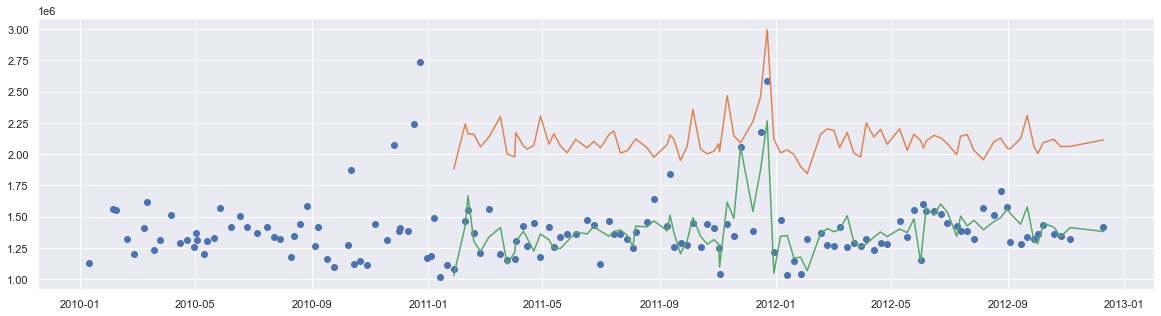

Store Number: 23
AR Residuals: avg -0.55, std 0.19
AR wiht Ext Residuals: avg -0.01, std 0.09


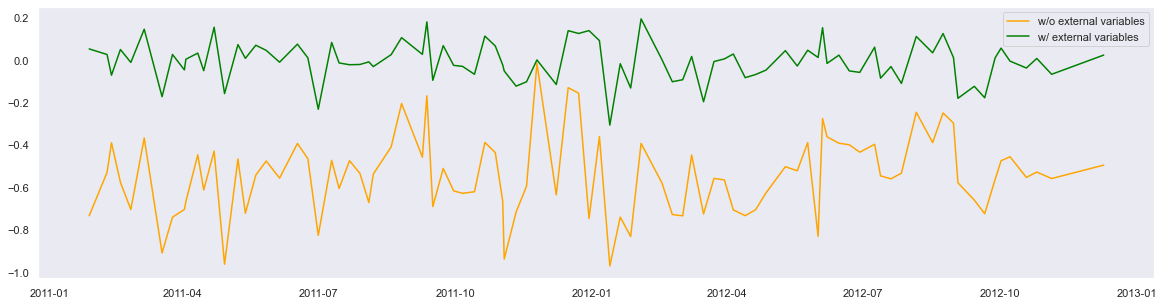

Store Number: 24
Score factor: 0.52


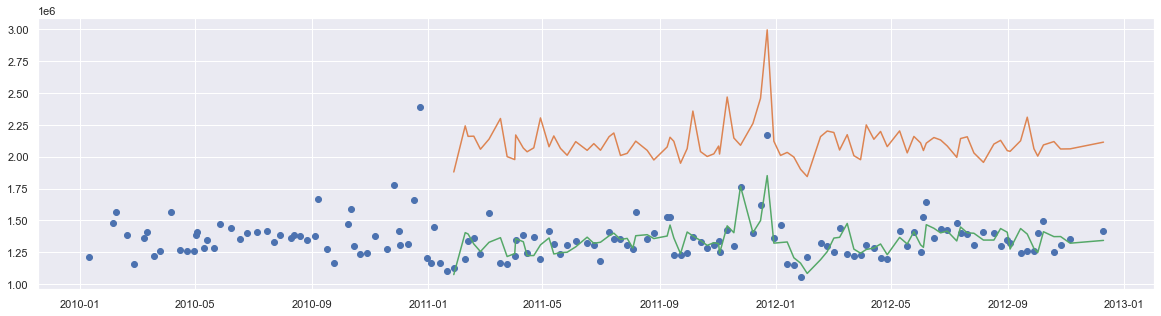

Store Number: 24
AR Residuals: avg -0.58, std 0.14
AR wiht Ext Residuals: avg -0.01, std 0.07


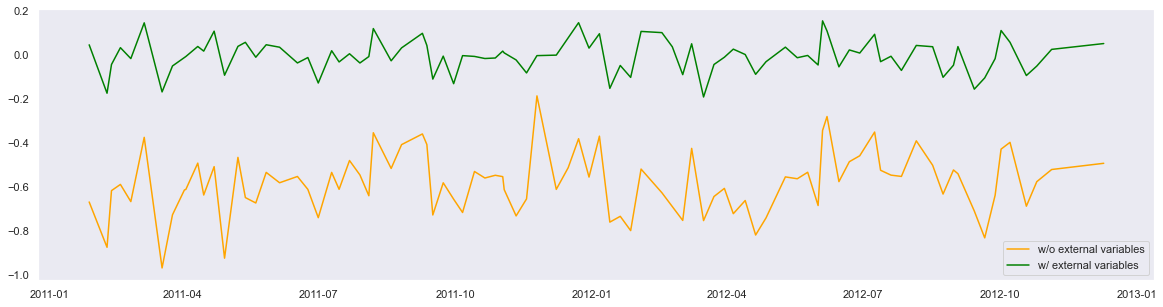

Store Number: 25
Score factor: 0.65


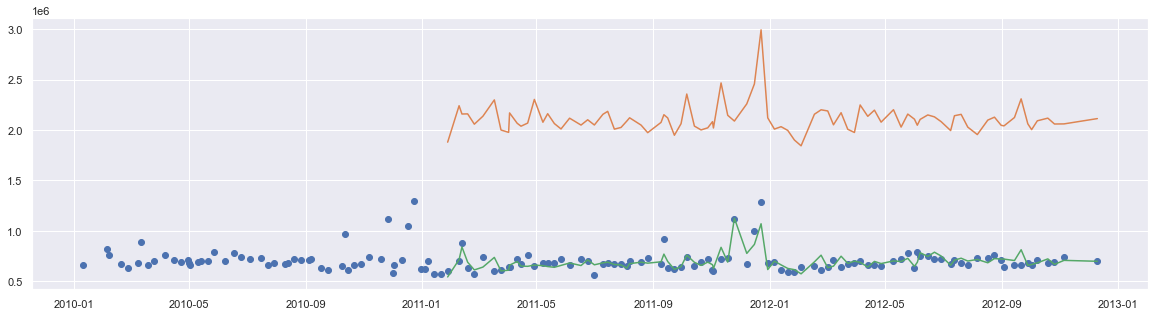

Store Number: 25
AR Residuals: avg -2.06, std 0.31
AR wiht Ext Residuals: avg -0.01, std 0.08


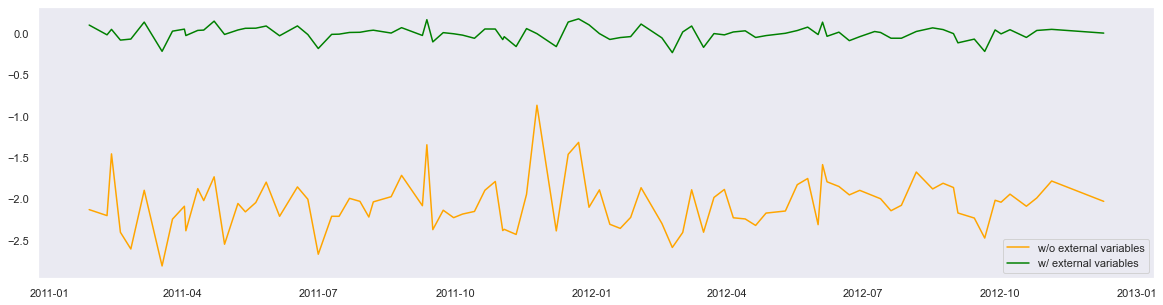

Store Number: 26
Score factor: 0.65


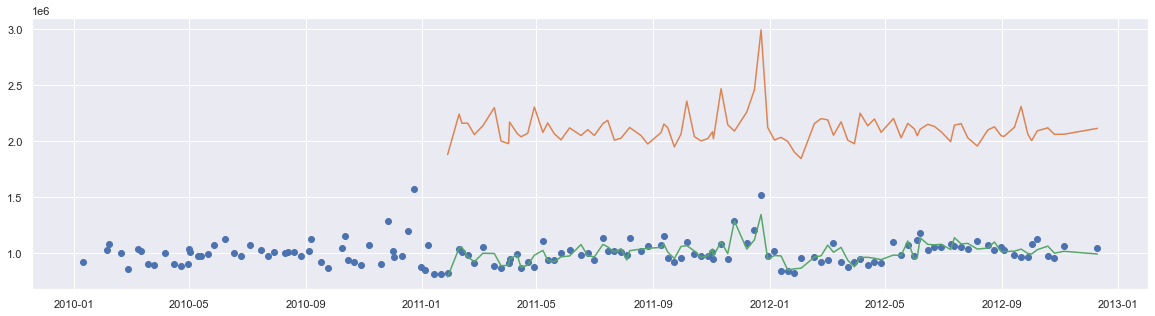

Store Number: 26
AR Residuals: avg -1.11, std 0.19
AR wiht Ext Residuals: avg -0.00, std 0.06


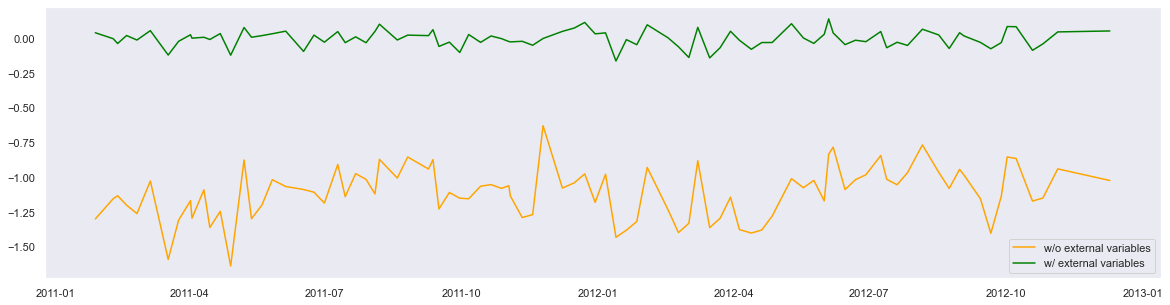

Store Number: 27
Score factor: 0.59


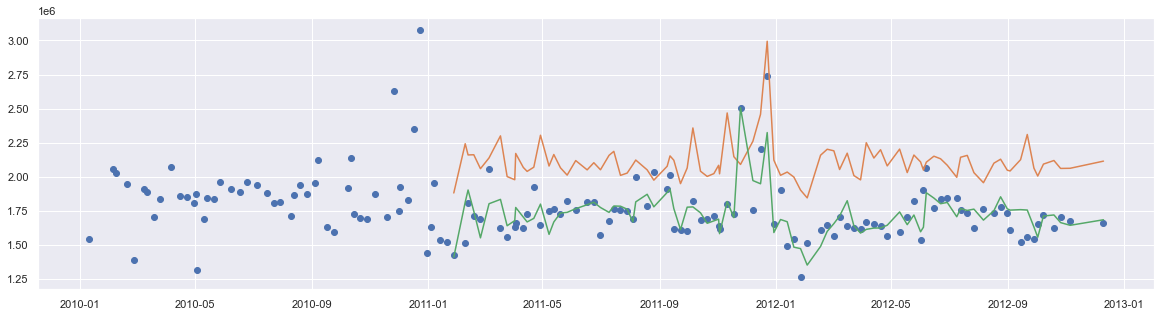

Store Number: 27
AR Residuals: avg -0.23, std 0.11
AR wiht Ext Residuals: avg -0.00, std 0.07


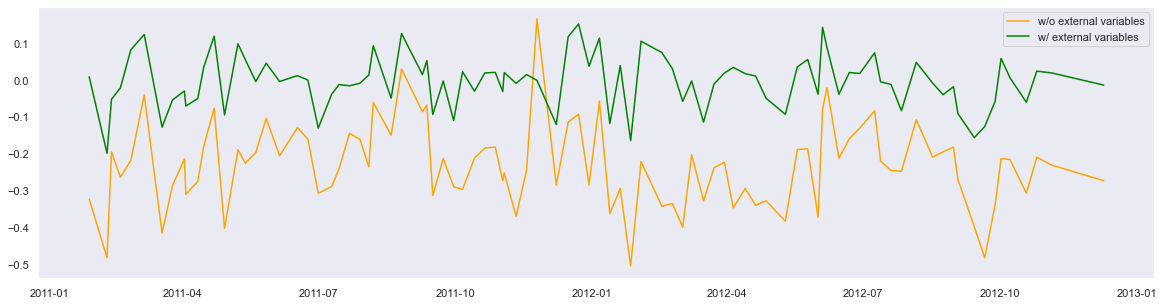

Store Number: 28
Score factor: 0.42


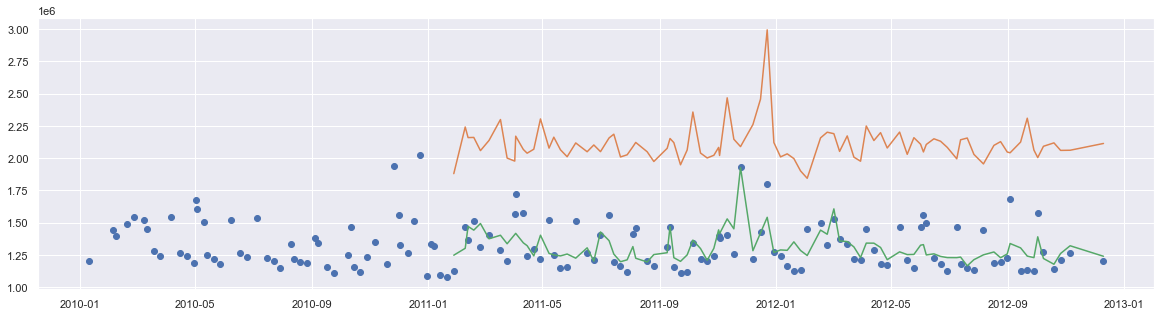

Store Number: 28
AR Residuals: avg -0.63, std 0.19
AR wiht Ext Residuals: avg -0.01, std 0.09


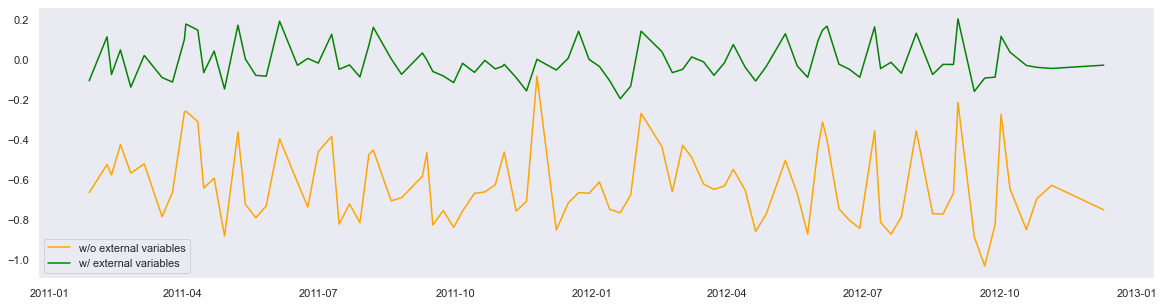

Store Number: 29
Score factor: 0.62


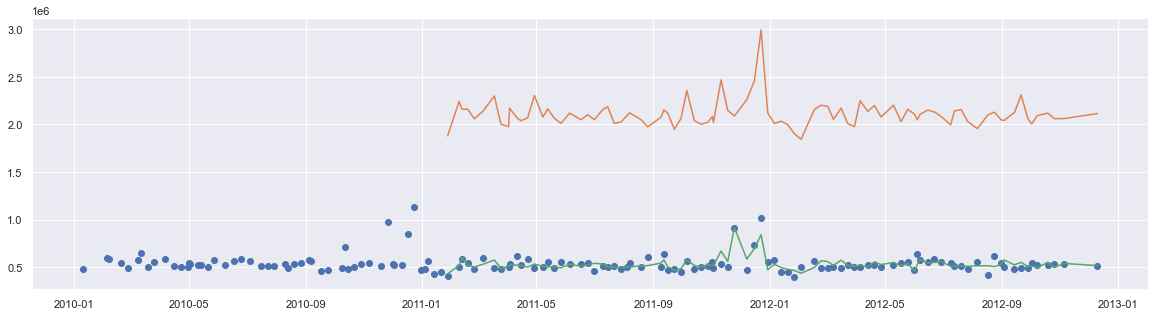

Store Number: 29
AR Residuals: avg -3.03, std 0.44
AR wiht Ext Residuals: avg -0.01, std 0.09


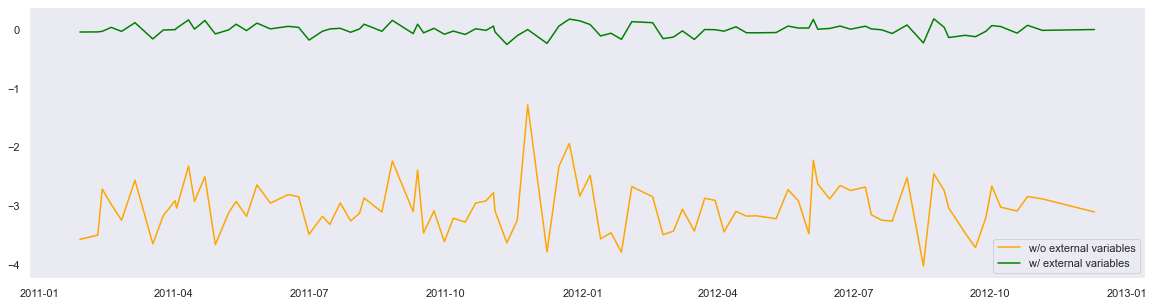

Store Number: 30
Score factor: 0.45


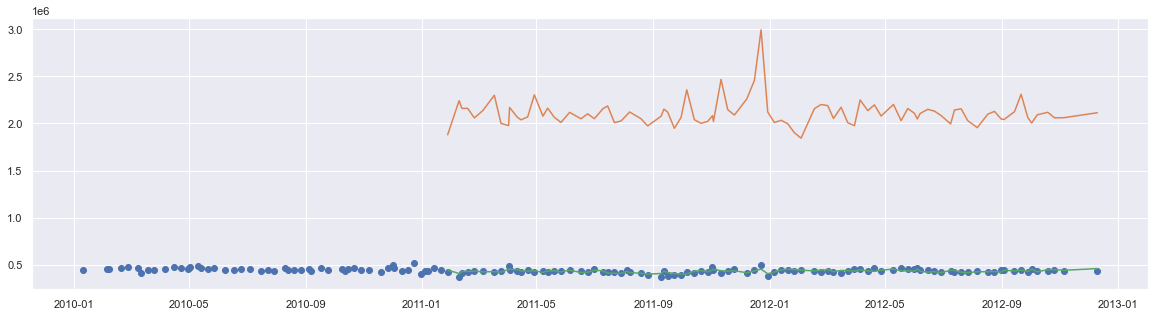

Store Number: 30
AR Residuals: avg -3.91, std 0.38
AR wiht Ext Residuals: avg -0.00, std 0.04


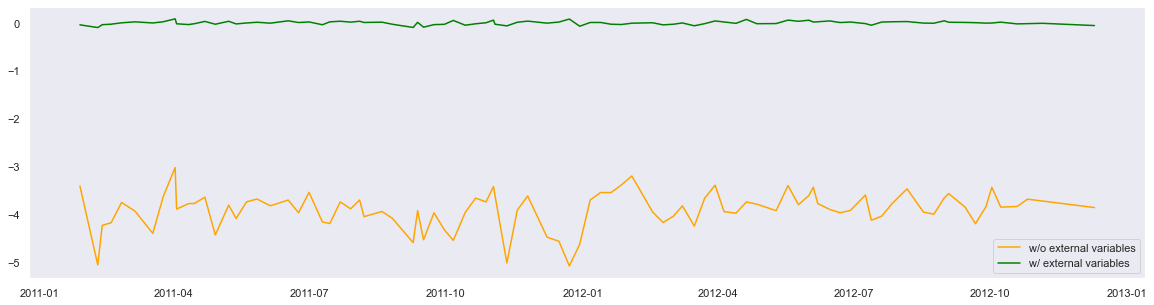

Store Number: 31
Score factor: 0.65


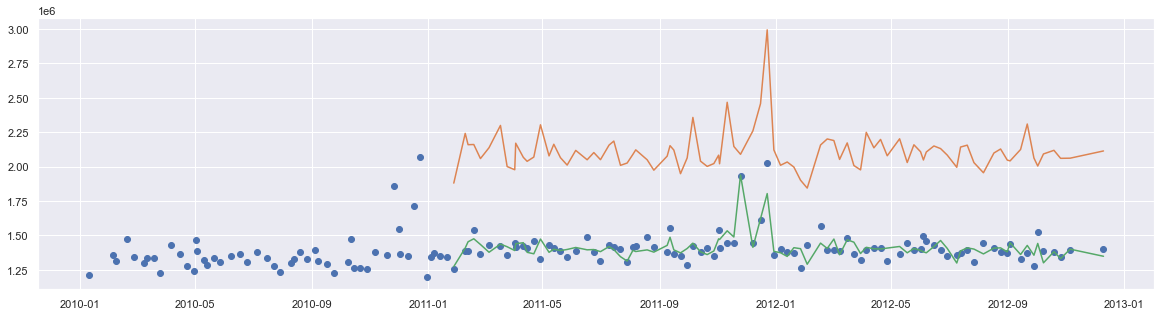

Store Number: 31
AR Residuals: avg -0.50, std 0.09
AR wiht Ext Residuals: avg -0.00, std 0.04


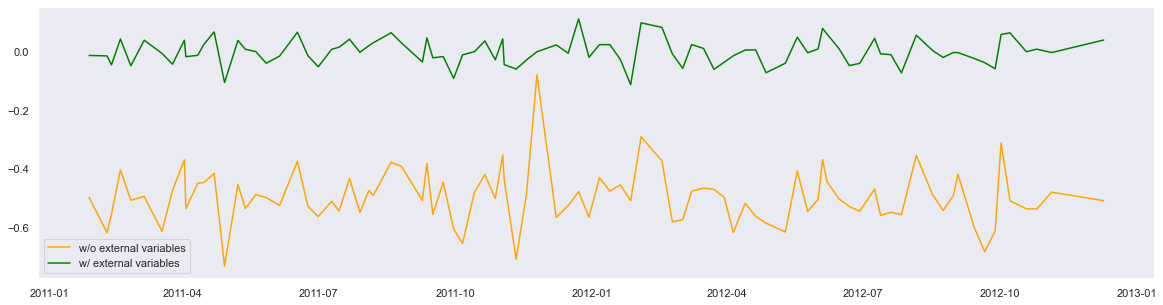

Store Number: 32
Score factor: 0.70


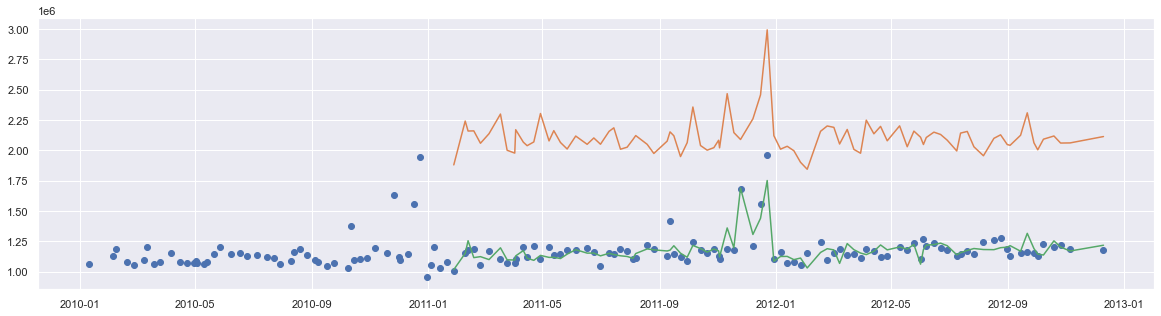

Store Number: 32
AR Residuals: avg -0.80, std 0.13
AR wiht Ext Residuals: avg -0.00, std 0.05


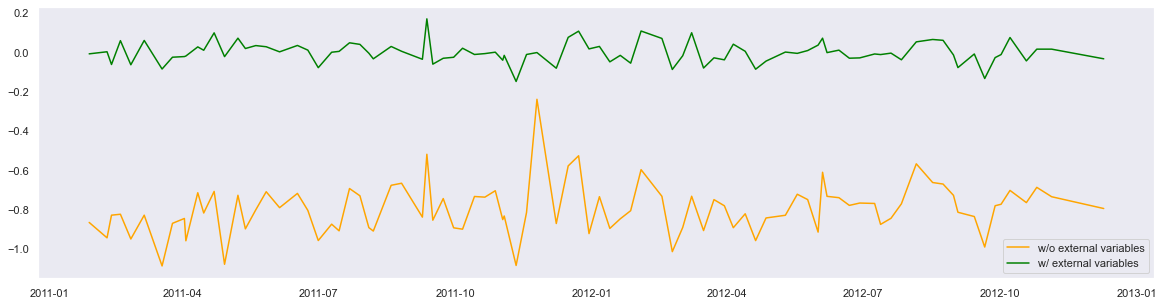

Store Number: 33
Score factor: 0.32


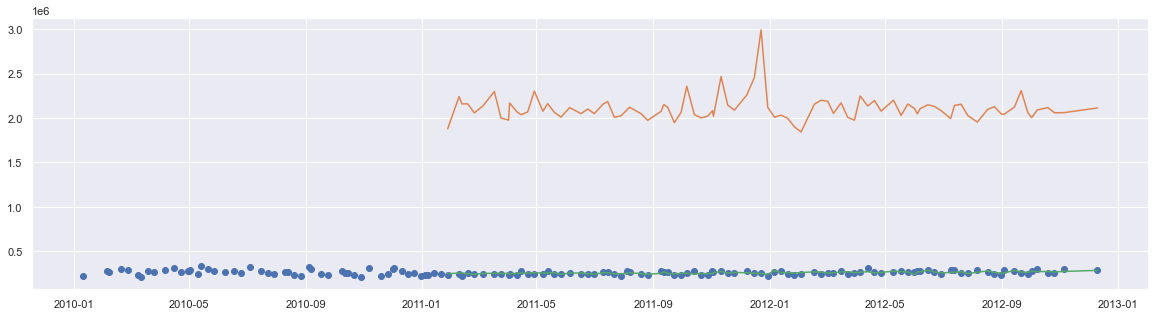

Store Number: 33
AR Residuals: avg -7.23, std 0.76
AR wiht Ext Residuals: avg -0.00, std 0.06


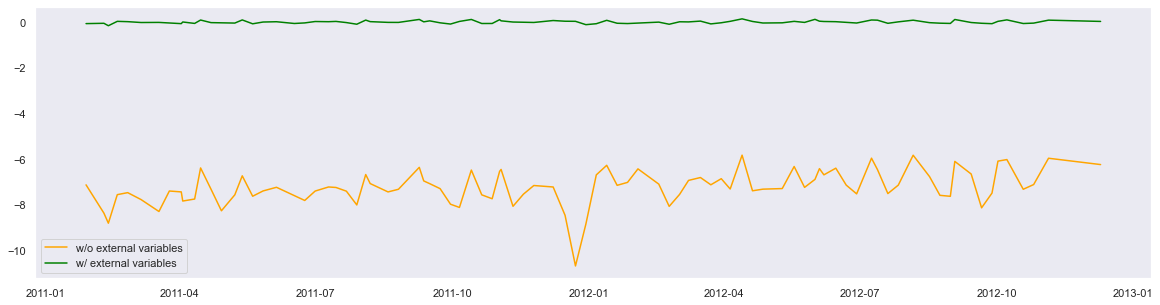

Store Number: 34
Score factor: 0.67


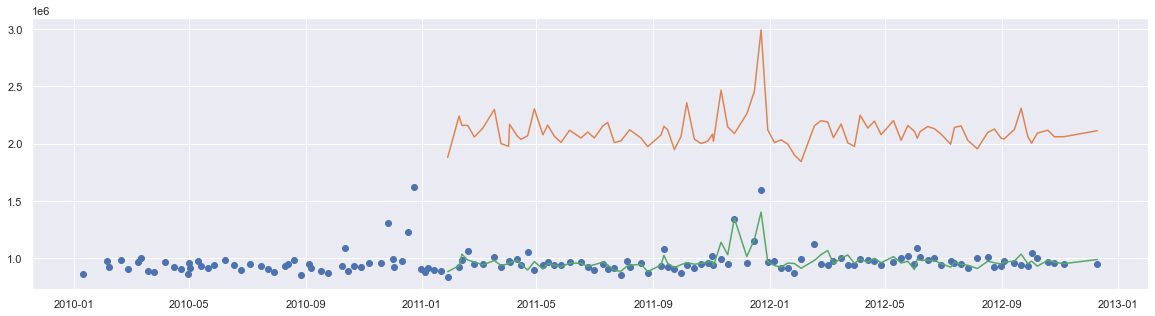

Store Number: 34
AR Residuals: avg -1.18, std 0.15
AR wiht Ext Residuals: avg -0.00, std 0.05


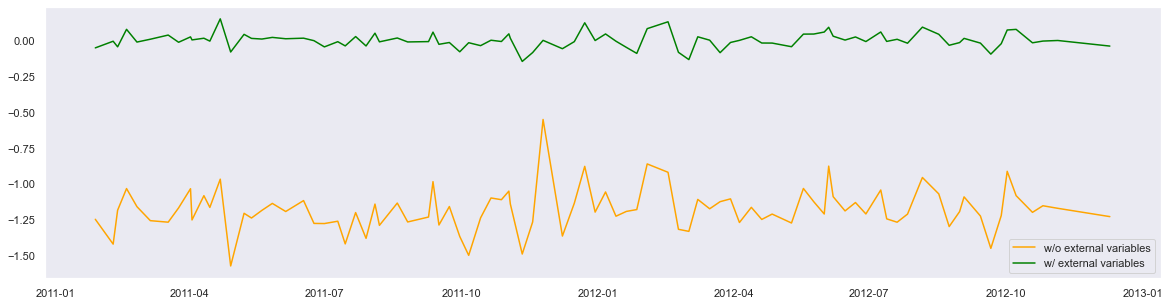

Store Number: 35
Score factor: 0.69


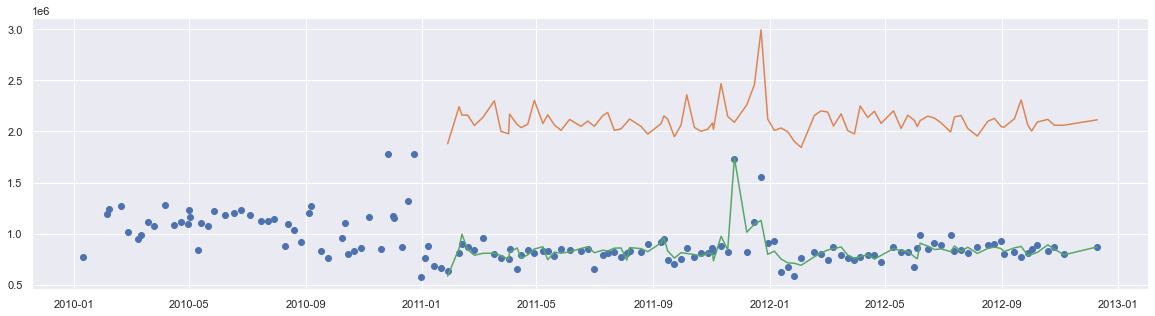

Store Number: 35
AR Residuals: avg -1.56, std 0.30
AR wiht Ext Residuals: avg -0.01, std 0.09


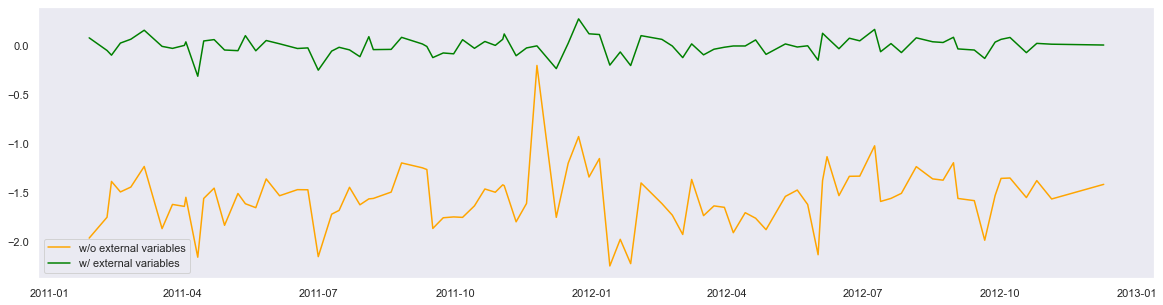

Store Number: 36
Score factor: 0.81


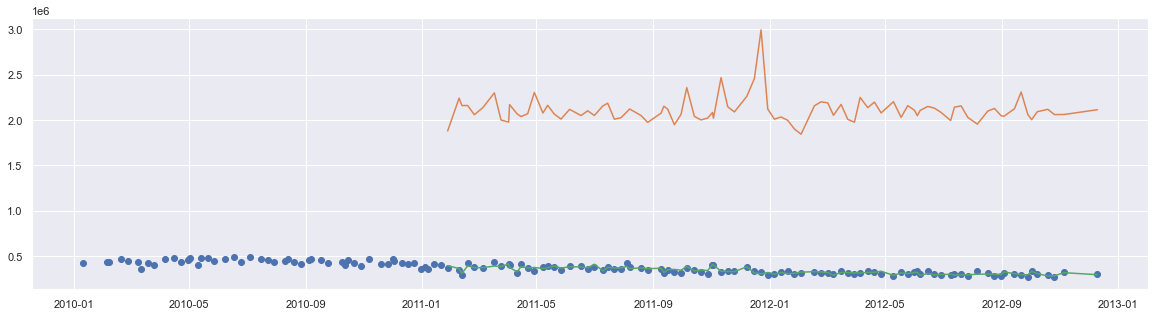

Store Number: 36
AR Residuals: avg -5.34, std 0.83
AR wiht Ext Residuals: avg -0.00, std 0.05


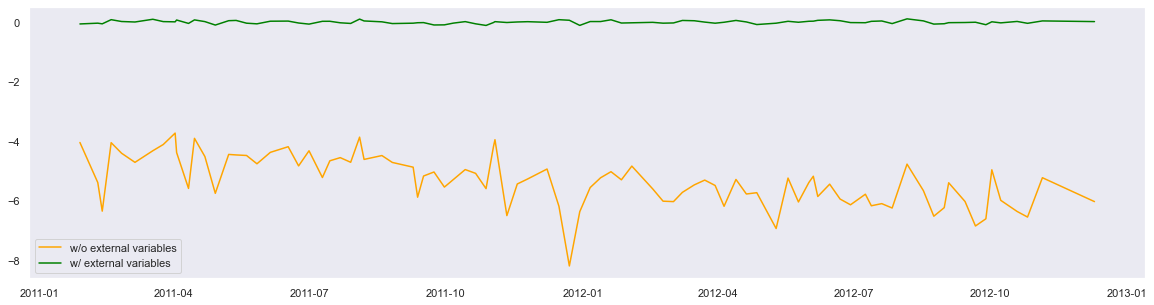

Store Number: 37
Score factor: 0.34


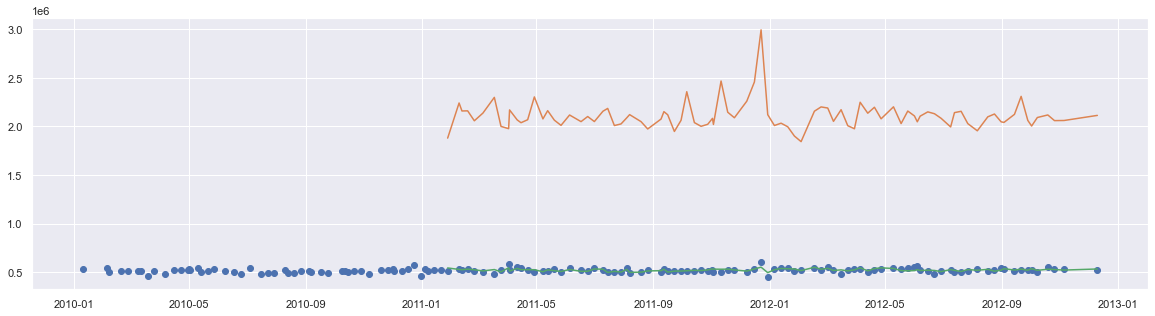

Store Number: 37
AR Residuals: avg -3.04, std 0.29
AR wiht Ext Residuals: avg -0.00, std 0.03


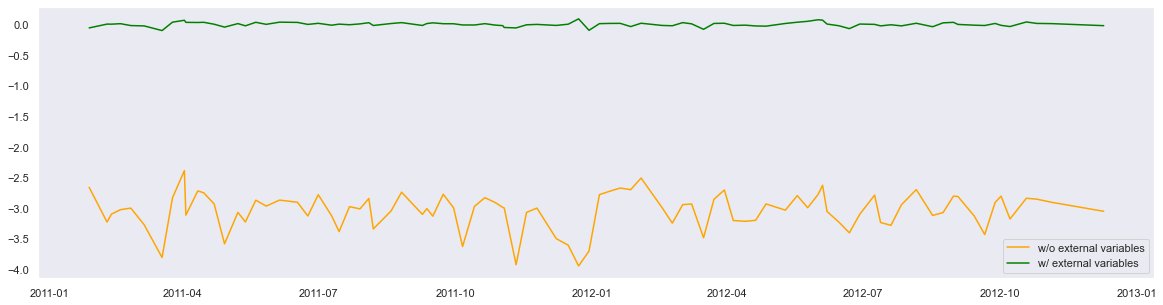

Store Number: 38
Score factor: 0.57


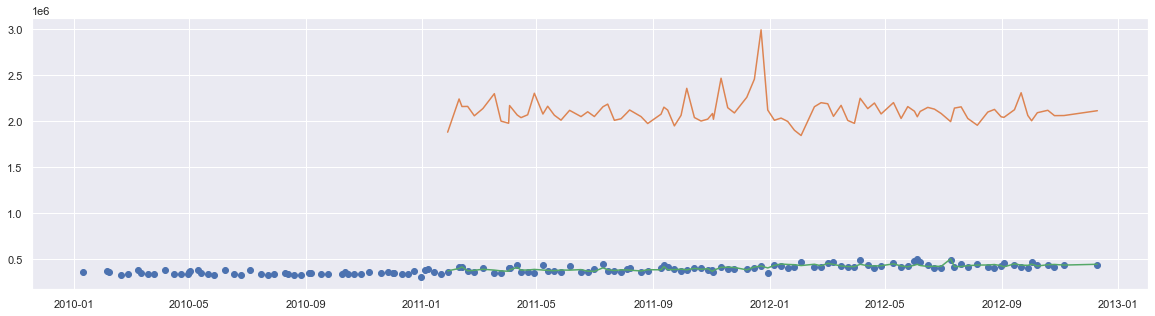

Store Number: 38
AR Residuals: avg -4.22, std 0.57
AR wiht Ext Residuals: avg -0.00, std 0.06


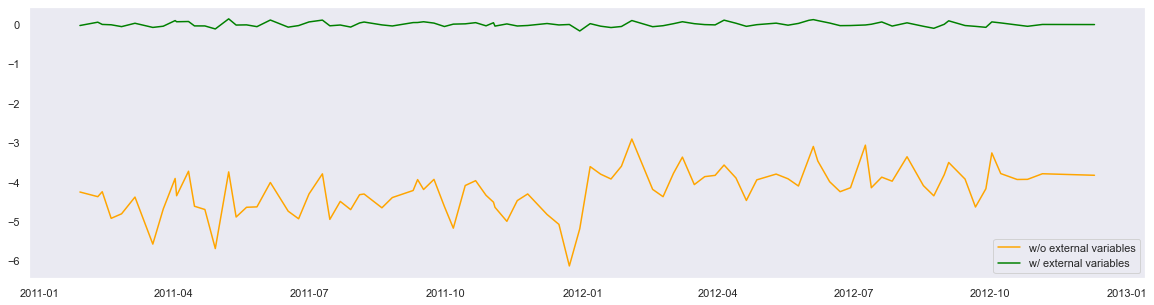

Store Number: 39
Score factor: 0.72


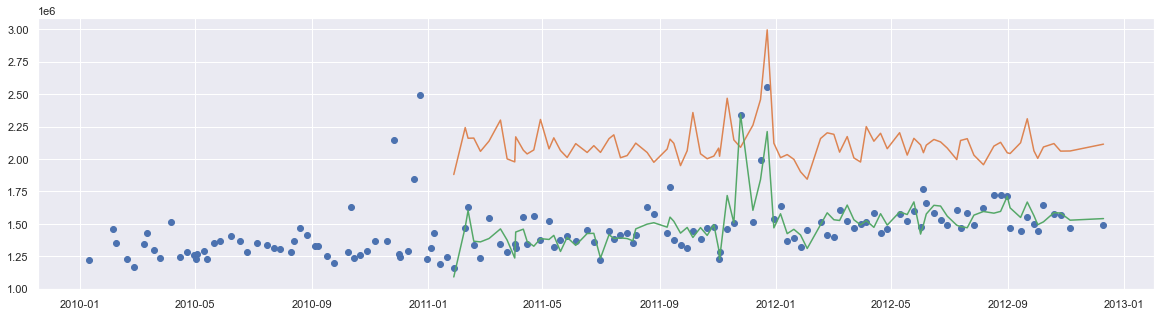

Store Number: 39
AR Residuals: avg -0.42, std 0.14
AR wiht Ext Residuals: avg -0.00, std 0.07


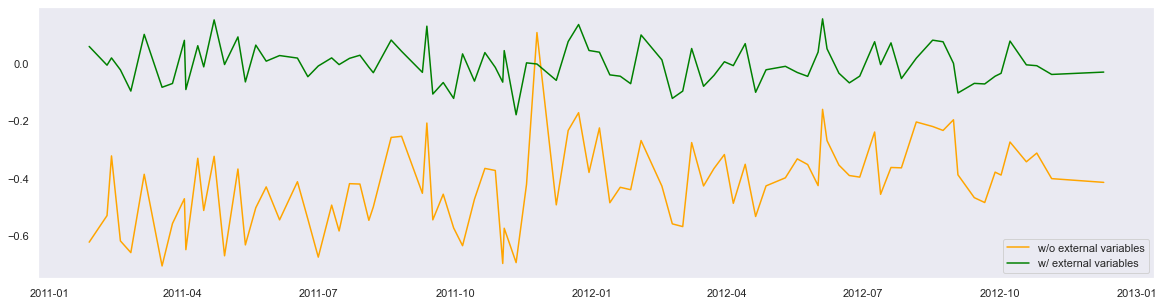

Store Number: 40
Score factor: 0.55


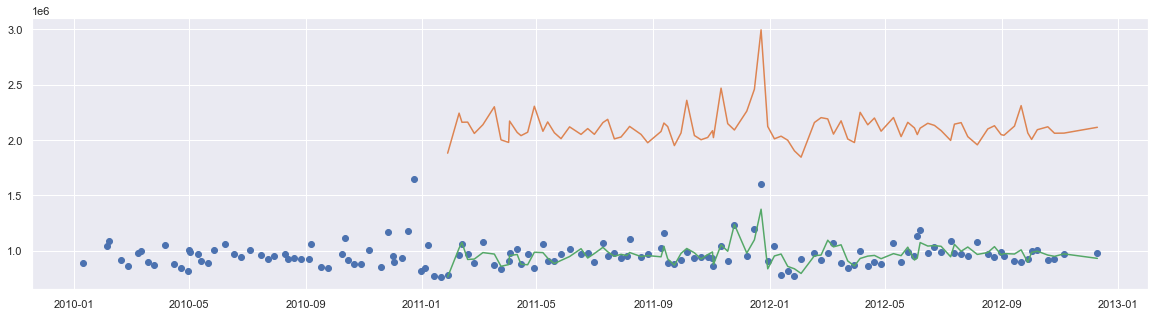

Store Number: 40
AR Residuals: avg -1.20, std 0.20
AR wiht Ext Residuals: avg -0.01, std 0.07


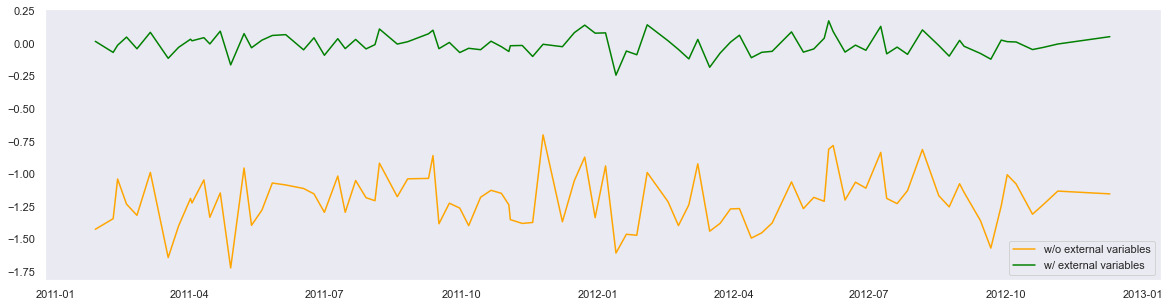

Store Number: 41
Score factor: 0.66


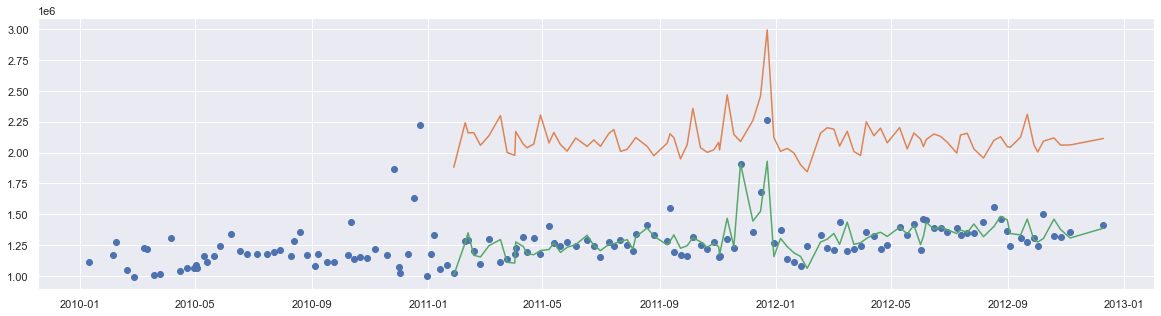

Store Number: 41
AR Residuals: avg -0.63, std 0.15
AR wiht Ext Residuals: avg -0.00, std 0.07


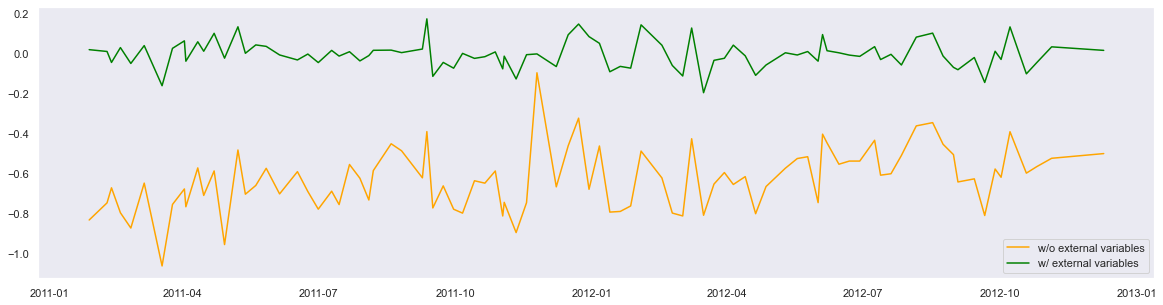

Store Number: 42
Score factor: 0.36


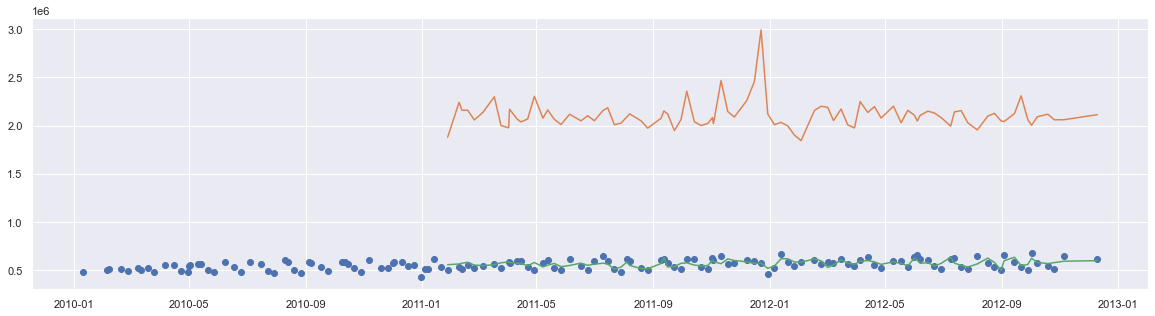

Store Number: 42
AR Residuals: avg -2.72, std 0.37
AR wiht Ext Residuals: avg -0.00, std 0.07


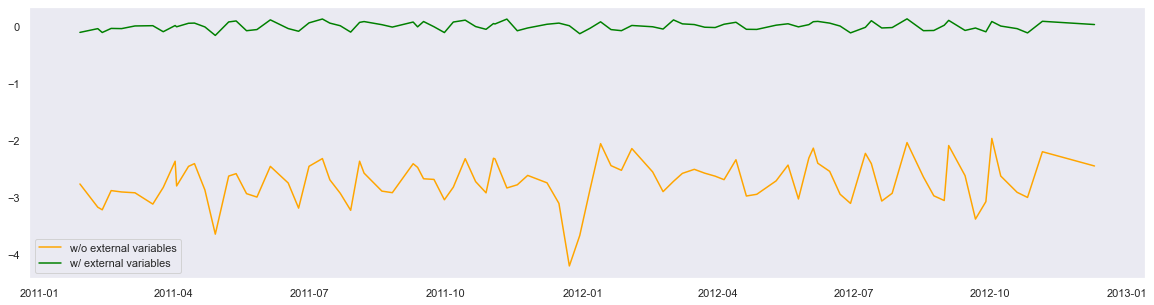

Store Number: 43
Score factor: 0.25


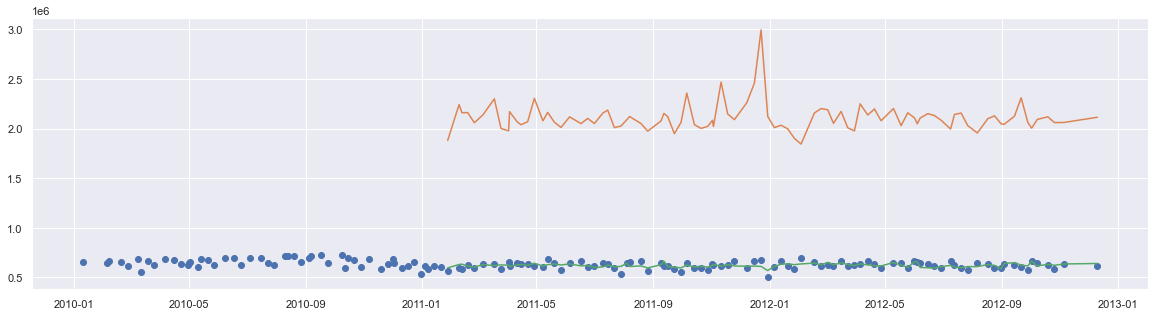

Store Number: 43
AR Residuals: avg -2.40, std 0.26
AR wiht Ext Residuals: avg -0.00, std 0.05


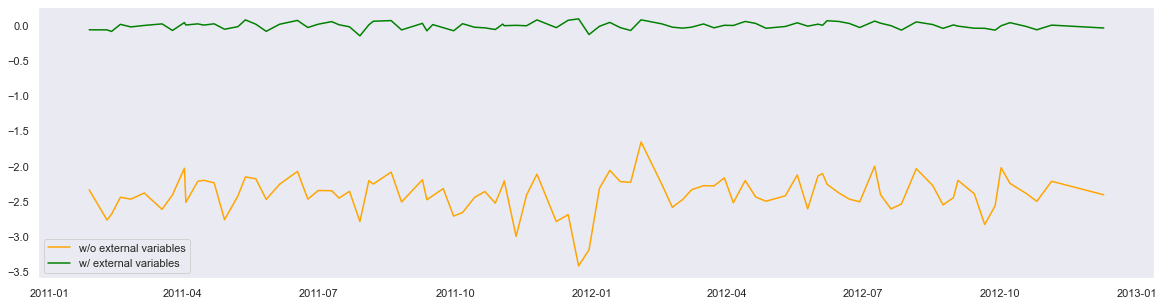

Store Number: 44
Score factor: 0.74


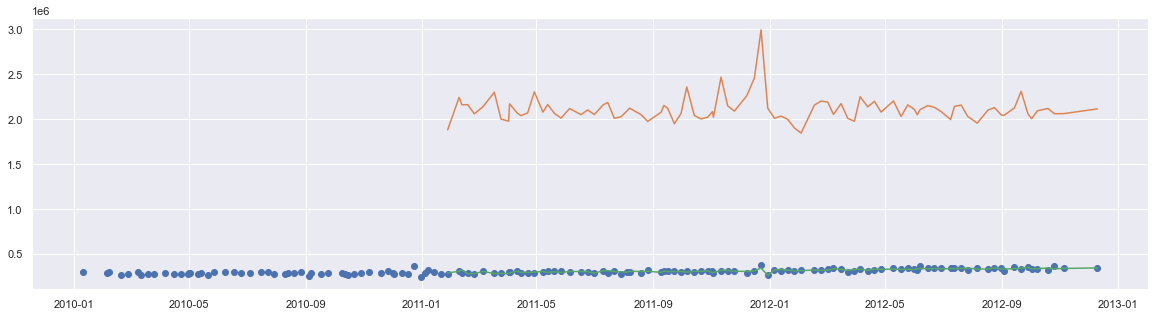

Store Number: 44
AR Residuals: avg -5.76, std 0.58
AR wiht Ext Residuals: avg -0.00, std 0.04


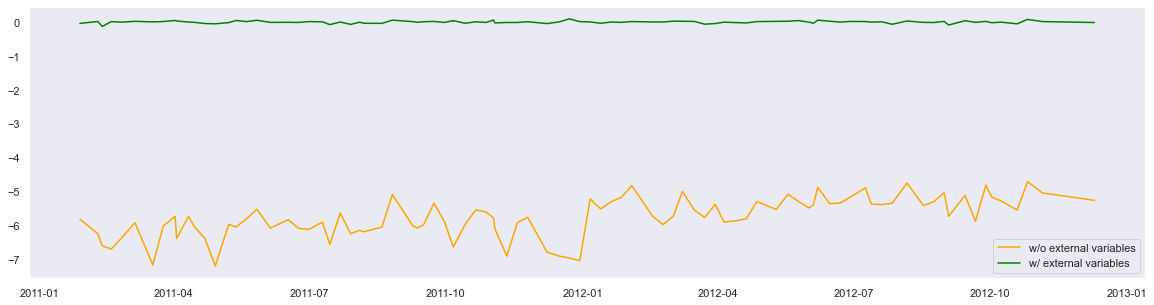

Store Number: 45
Score factor: 0.69


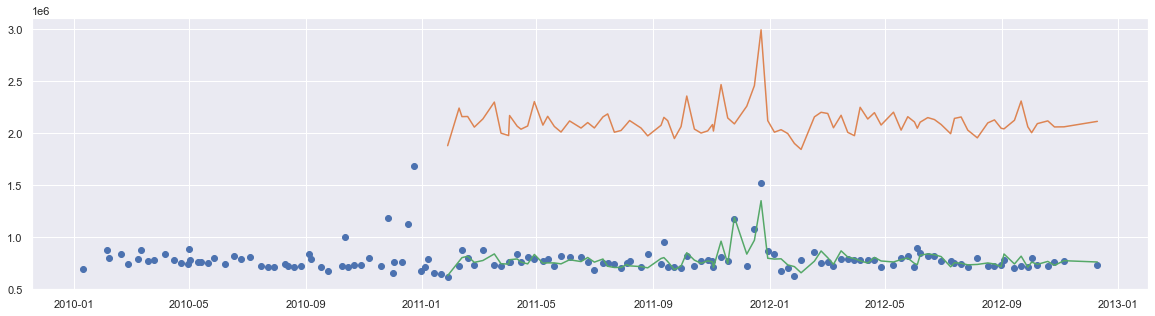

Store Number: 45
AR Residuals: avg -1.73, std 0.25
AR wiht Ext Residuals: avg -0.00, std 0.07


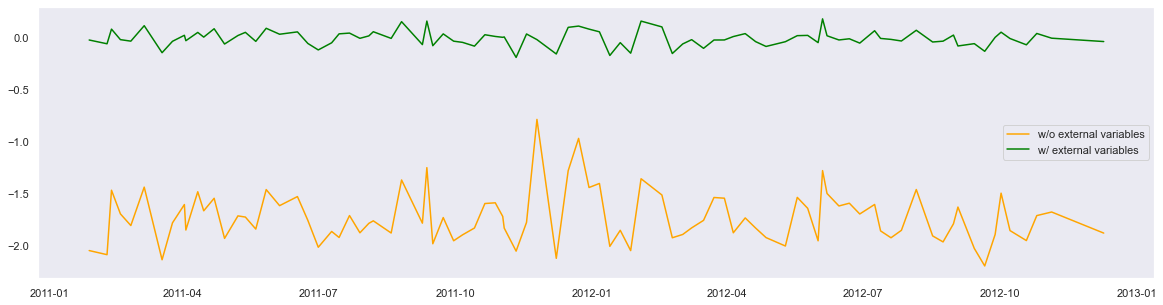

In [60]:
storenum = [i for i in range(1,46)]

for i in storenum:
    all_store_test(i)

In [61]:
zipped = list(zip(stores,ar_residuals,ar_residuals_std,ar_withext_residuals,ar_withext_residuals_std))
result_df = pd.DataFrame(zipped, columns = ['Store','ar_residuals','ar_residuals_std',
                                            'ar_withext_residuals','ar_withext_residuals_std'])
store_df = merge_df[["Store","Type"]]
store_df = store_df.drop_duplicates(subset='Store')
final_df = pd.merge(result_df,store_df, on=['Store'], how='left')

In [62]:
#looking at final results by store type
final_df.groupby(by=['Type']).mean()

Store  ar_residuals_std  ar_withext_residuals  \
Type                                                      
A     22.227273          0.190948             -0.004142   
B     18.352941          0.339300             -0.006092   
C     39.000000          0.408617             -0.002322   

      ar_withext_residuals_std  
Type                            
A                     0.065595  
B                     0.081574  
C                     0.046737